In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from scipy import stats
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
path = "data/Cleaned_marketing_campaign.csv"
data = pd.read_csv(path)

In [3]:
data

Unnamed: 0     ID  Year_Birth   Education Marital_Status   Income  \
0              0   5524        1957  Graduation         Single  58138.0   
1              1   2174        1954  Graduation         Single  46344.0   
2              2   4141        1965  Graduation       Together  71613.0   
3              3   6182        1984  Graduation       Together  26646.0   
4              4   5324        1981         PhD        Married  58293.0   
...          ...    ...         ...         ...            ...      ...   
2035        2035  10870        1967  Graduation        Married  61223.0   
2036        2036   4001        1946         PhD       Together  64014.0   
2037        2037   7270        1981  Graduation       Divorced  56981.0   
2038        2038   8235        1956      Master       Together  69245.0   
2039        2039   9405        1954         PhD        Married  52869.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  \
0           0         0  2012-04-09       58  ...                  7   
1           1         1  2014-08-03       38  ...                  5   
2           0         0         NaN       26  ...                  4   
3           1         0  2014-10-02       26  ...                  6   
4           1         0         NaN       94  ...                  5   
...       ...       ...         ...      ...  ...                ...   
2035        0         1         NaN       46  ...                  5   
2036        2         1  2014-10-06       56  ...                  7   
2037        0         0         NaN       91  ...                  6   
2038        0         1         NaN        8  ...                  3   
2039        1         1         NaN       40  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2035             0             0             0             0             0   
2036             0             0             0             1             0   
2037             0             1             0             0             0   
2038             0             0             0             0             0   
2039             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11       1.0  
1            0              3         11       0.0  
2            0              3         11       0.0  
3            0              3         11       0.0  
4            0              3         11       0.0  
...        ...            ...        ...       ...  
2035         0              3         11       0.0  
2036         0              3         11       0.0  
2037         0              3         11       0.0  
2038         0              3         11       0.0  
2039         0              3         11       1.0  

[2040 rows x 30 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2040 non-null   int64  
 1   ID                   2040 non-null   int64  
 2   Year_Birth           2040 non-null   int64  
 3   Education            2040 non-null   object 
 4   Marital_Status       2040 non-null   object 
 5   Income               2040 non-null   float64
 6   Kidhome              2040 non-null   int64  
 7   Teenhome             2040 non-null   int64  
 8   Dt_Customer          811 non-null    object 
 9   Recency              2040 non-null   int64  
 10  MntWines             2040 non-null   int64  
 11  MntFruits            2040 non-null   int64  
 12  MntMeatProducts      2040 non-null   int64  
 13  MntFishProducts      2040 non-null   int64  
 14  MntSweetProducts     2040 non-null   int64  
 15  MntGoldProds         2040 non-null   i

In [5]:
#Information on features 
data.describe()

Unnamed: 0            ID   Year_Birth         Income      Kidhome  \
count  2040.000000   2040.000000  2040.000000    2040.000000  2040.000000   
mean   1019.500000   5595.943627  1968.489706   52161.539133     0.440686   
std     589.041594   3249.676614    11.790300   25819.563723     0.538295   
min       0.000000      0.000000  1899.000000       0.000000     0.000000   
25%     509.750000   2834.750000  1959.000000   35397.000000     0.000000   
50%    1019.500000   5492.000000  1970.000000   51533.000000     0.000000   
75%    1529.250000   8439.750000  1977.000000   68655.500000     1.000000   
max    2039.000000  11191.000000  1996.000000  666666.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2040.000000  2040.000000  2040.000000  2040.000000      2040.000000   
mean      0.509314    50.837255   312.000980    26.855392       169.277941   
std       0.546882    41.680856   341.644224    43.187459       228.263721   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000    24.000000    25.000000     1.000000        16.000000   
50%       0.000000    50.000000   182.000000     8.000000        68.000000   
75%       1.000000    74.000000   514.250000    33.000000       235.000000   
max       2.000000   861.000000  1493.000000   490.000000      1725.000000   

       ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count  ...        2040.000000   2040.000000   2040.000000   2040.000000   
mean   ...           5.250000      0.073529      0.076961      0.075490   
std    ...           2.493788      0.261068      0.266595      0.264245   
min    ...           0.000000      0.000000      0.000000      0.000000   
25%    ...           3.000000      0.000000      0.000000      0.000000   
50%    ...           6.000000      0.000000      0.000000      0.000000   
75%    ...           7.000000      0.000000      0.000000      0.000000   
max    ...          20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact    Z_Revenue  \
count   2040.000000   2040.000000  2040.000000    2040.000000  2040.000000   
mean       0.062745      0.013725     0.039216       3.082353    10.887255   
std        0.242563      0.116378     0.315422       0.807689     1.105976   
min        0.000000      0.000000     0.000000       3.000000     0.000000   
25%        0.000000      0.000000     0.000000       3.000000    11.000000   
50%        0.000000      0.000000     0.000000       3.000000    11.000000   
75%        0.000000      0.000000     0.000000       3.000000    11.000000   
max        1.000000      1.000000     3.000000      11.000000    11.000000   

          Response  
count  2019.000000  
mean      0.154037  
std       0.361073  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

In [6]:
data.duplicated().sum()

0

#### Dropping not so important columns

In [7]:

data.drop(columns=['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome'], inplace=True)


data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

#### Dealing with Dt_customer column

In [8]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')

In [9]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

#### Creating Age from Year_Birth  , Considering the most recent year is 2014

In [10]:
data['Age'] = 2014 - data['Year_Birth']

In [11]:
# Calculating the interquartile range (IQR) for identifying outliers
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
# Identifying outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
num_outliers = len(outliers)
percent_outliers = (num_outliers / len(data)) * 100

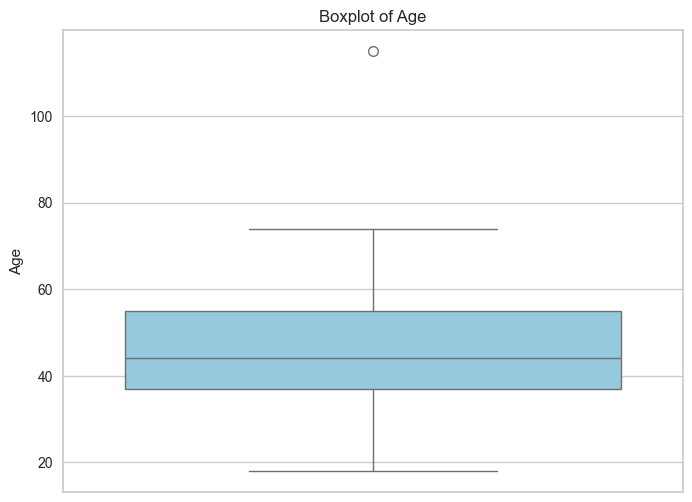

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Age'], color="skyblue")
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [14]:
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {percent_outliers:.2f}%")

Number of outliers: 1
Percentage of outliers: 0.05%


In [15]:
# Removing the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

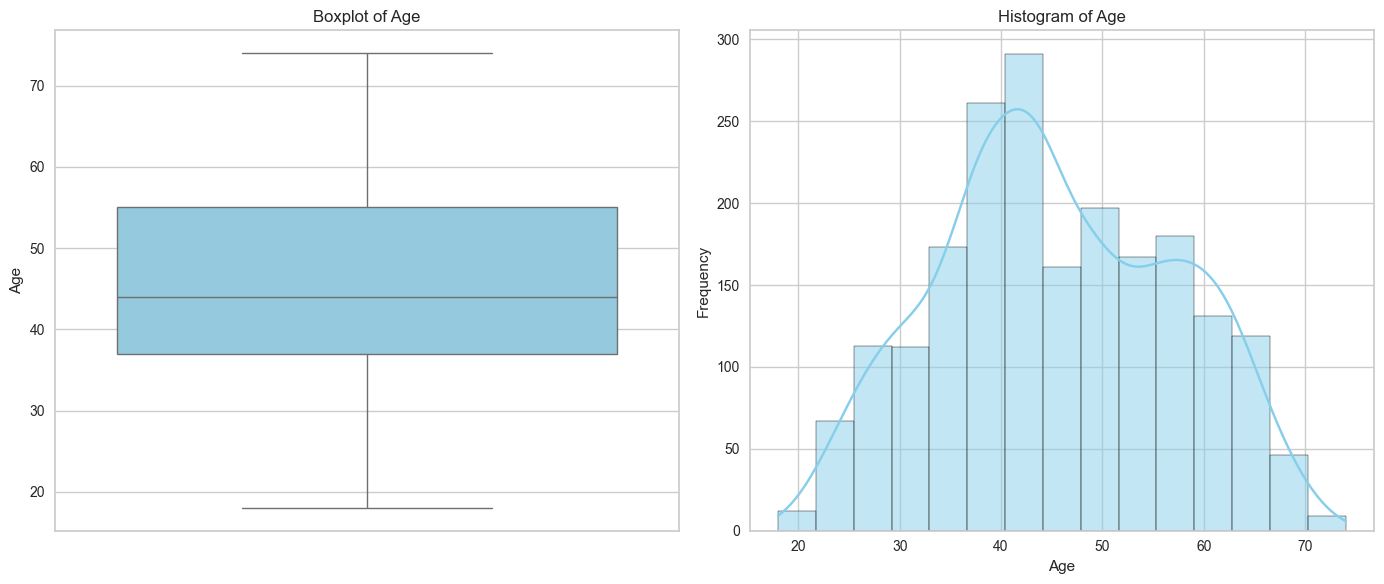

In [16]:
mean_age = data['Age'].mean()
mode_age, mode_count = stats.mode(data['Age'])[0][0], stats.mode(data['Age'])[1][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Age
sns.boxplot(y=data['Age'], color="skyblue", ax=ax1)
ax1.set_title('Boxplot of Age')
ax1.set_ylabel('Age')

# Histogram for Age
sns.histplot(data['Age'], bins=15, color="skyblue", kde=True, ax=ax2)
ax2.set_title('Histogram of Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### how much customers spend in total and in distribution.

In [17]:
data['Total Spending'] = (
    data['MntWines'] + 
    data['MntFruits'] + 
    data['MntMeatProducts'] + 
    data['MntFishProducts'] + 
    data['MntSweetProducts'] + 
    data['MntGoldProds']
)


In [18]:
min_spending = data['Total Spending'].min()
max_spending = data['Total Spending'].max()
mean_spending = data['Total Spending'].mean()
mode_spending, mode_count = stats.mode(data['Total Spending'])[0][0], stats.mode(data['Total Spending'])[1][0]

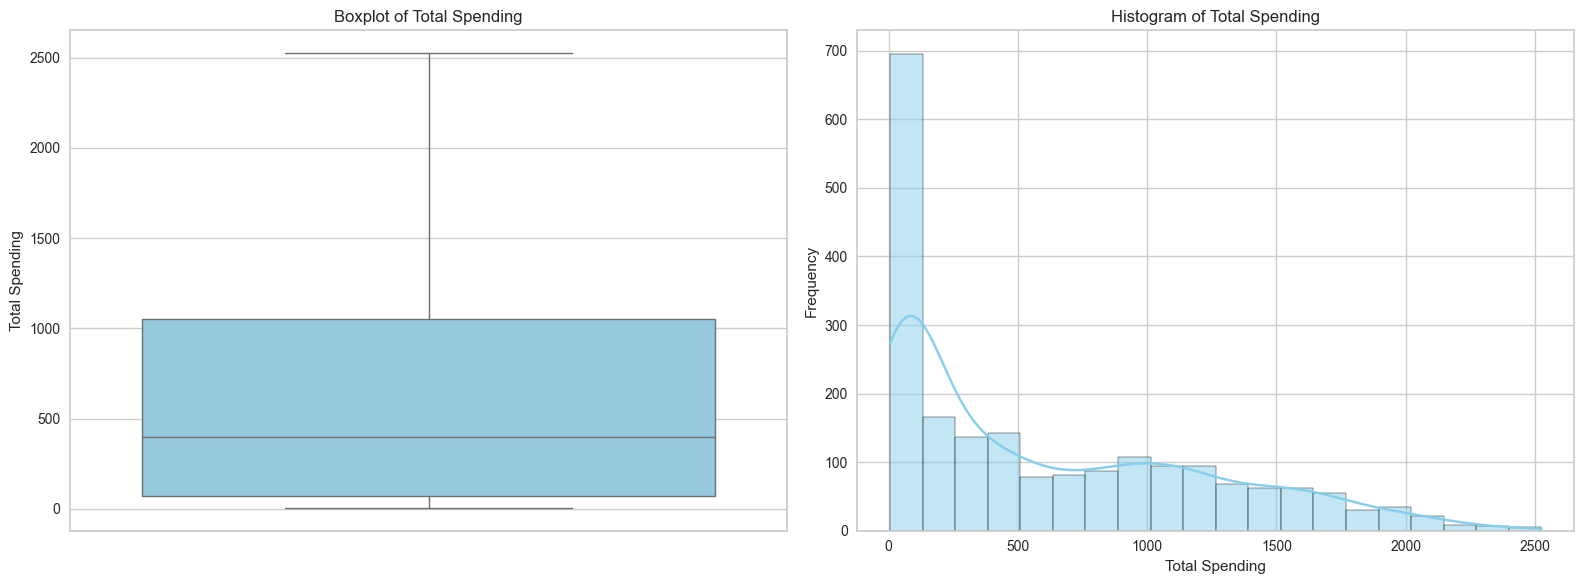

Mean of Total Spending: 613.80
Minimum of Total Spending: 5
Maximum of Total Spending: 2525
Mode of Total Spending: 46 (repeated 16 times)


In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for Total Spending
sns.boxplot(y=data['Total Spending'], color="skyblue", ax=ax1)
ax1.set_title('Boxplot of Total Spending')
ax1.set_ylabel('Total Spending')

# Histogram for Total Spending
sns.histplot(data['Total Spending'], bins=20, color="skyblue", kde=True, ax=ax2)
ax2.set_title('Histogram of Total Spending')
ax2.set_xlabel('Total Spending')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Mean of Total Spending: {mean_spending:.2f}")
print(f"Minimum of Total Spending: {min_spending}")
print(f"Maximum of Total Spending: {max_spending}")
print(f"Mode of Total Spending: {mode_spending} (repeated {mode_count} times)")

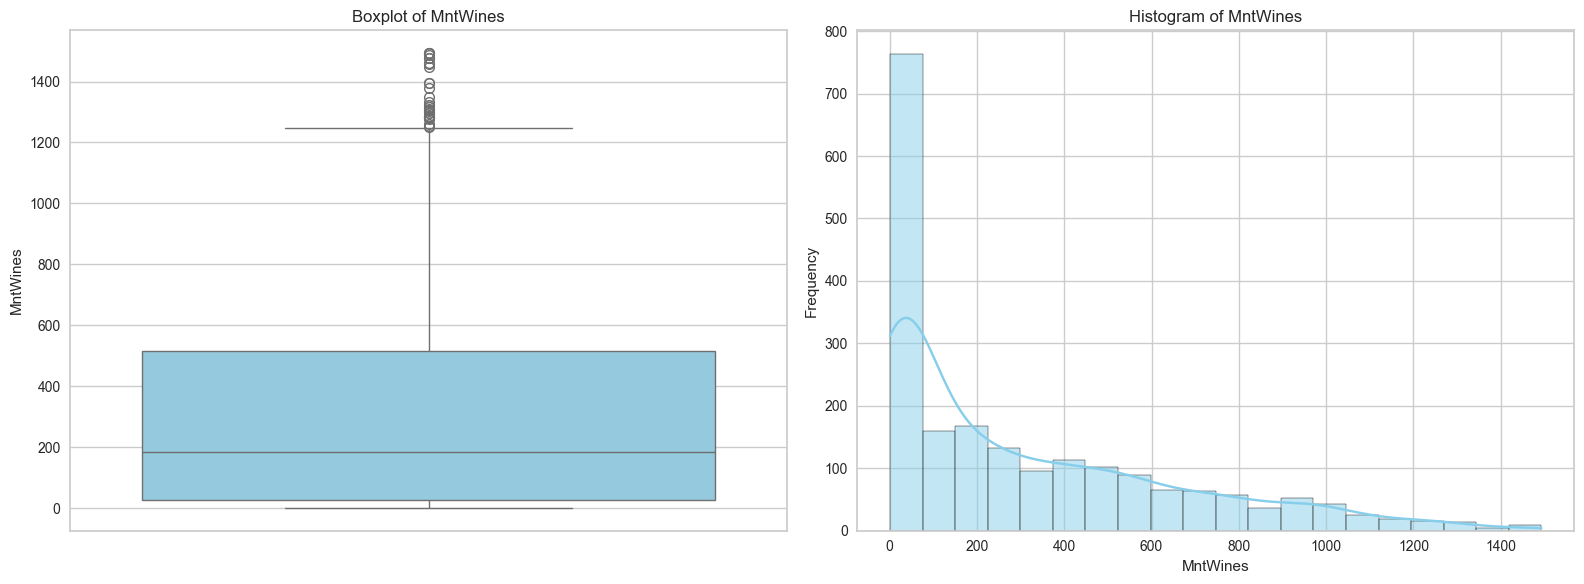

Minimum of MntWines: 1
Maximum of MntWines: 1493
Mean of MntWines: 313.94
Mode of MntWines: 1 (repeated 34 times)


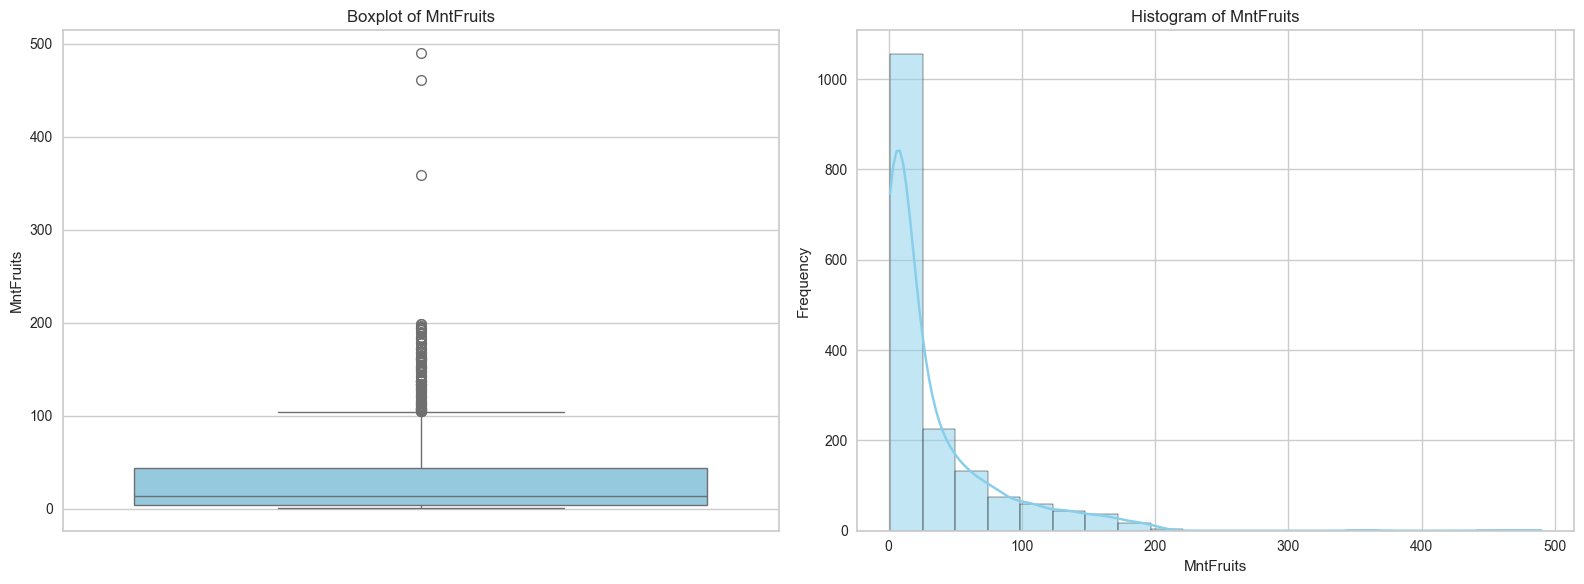

Minimum of MntFruits: 1
Maximum of MntFruits: 490
Mean of MntFruits: 33.06
Mode of MntFruits: 1 (repeated 148 times)


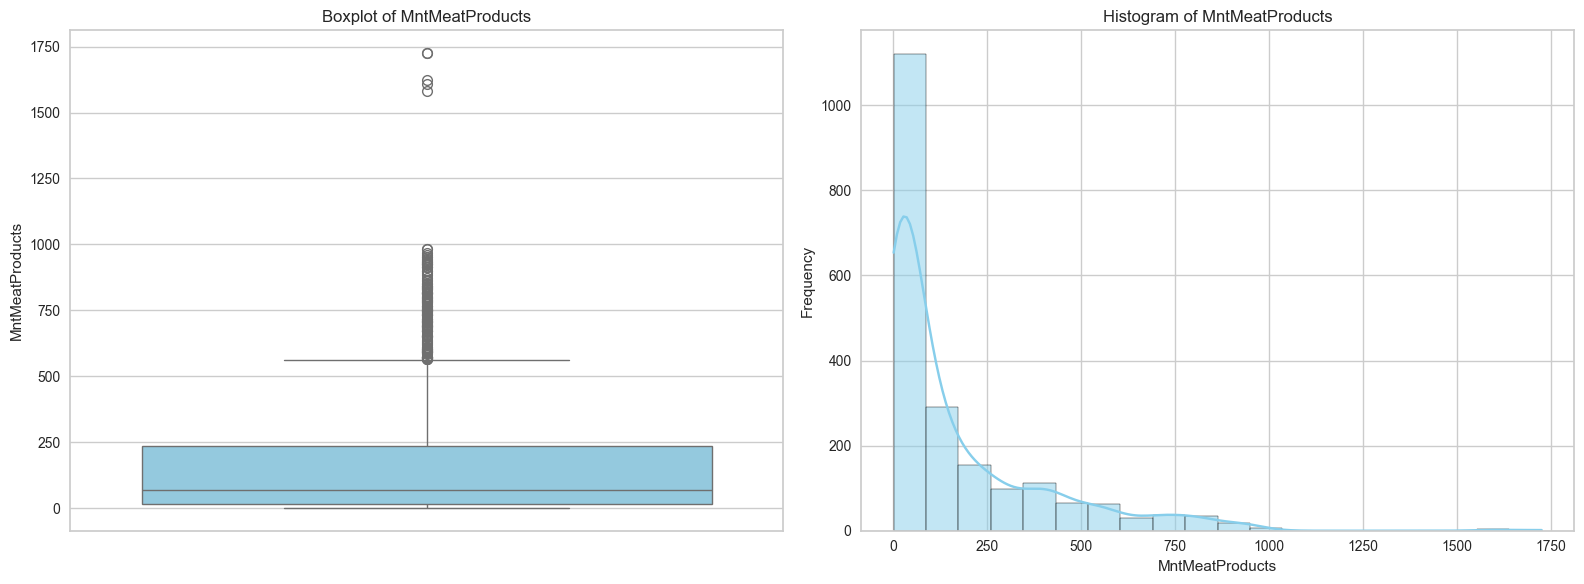

Minimum of MntMeatProducts: 1
Maximum of MntMeatProducts: 1725
Mean of MntMeatProducts: 169.50
Mode of MntMeatProducts: 11 (repeated 44 times)


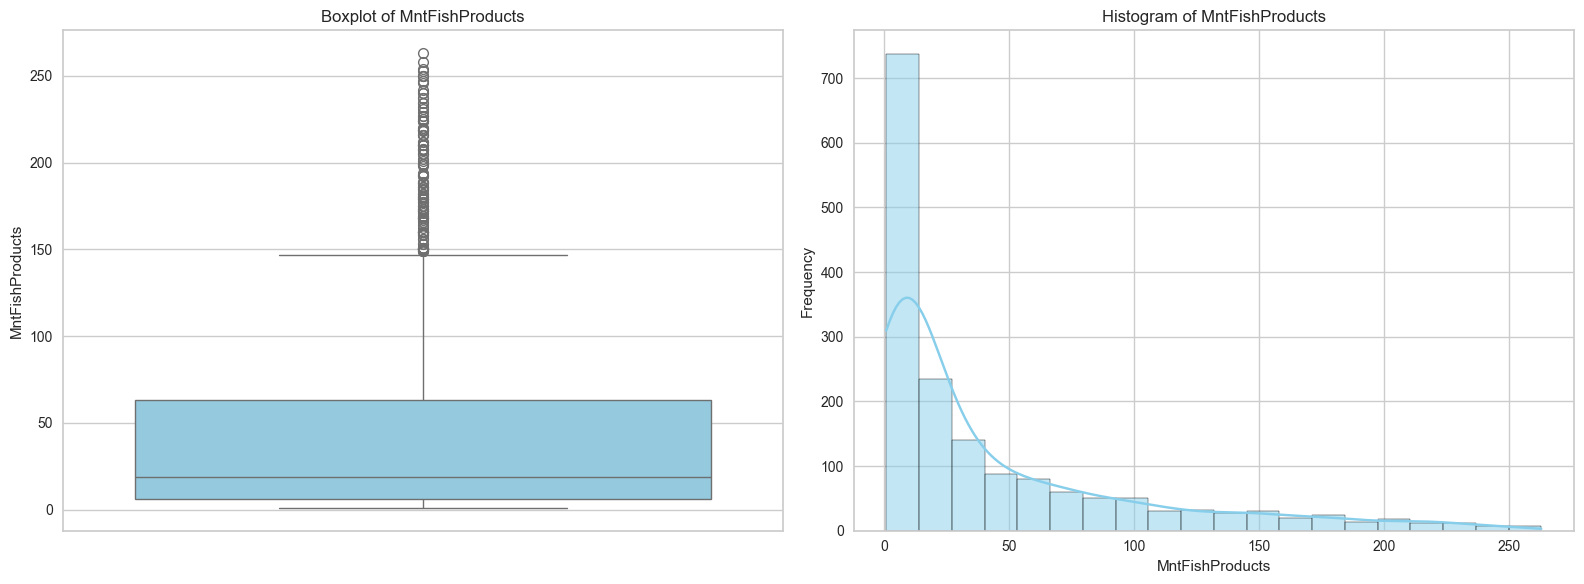

Minimum of MntFishProducts: 1
Maximum of MntFishProducts: 263
Mean of MntFishProducts: 44.47
Mode of MntFishProducts: 2 (repeated 154 times)


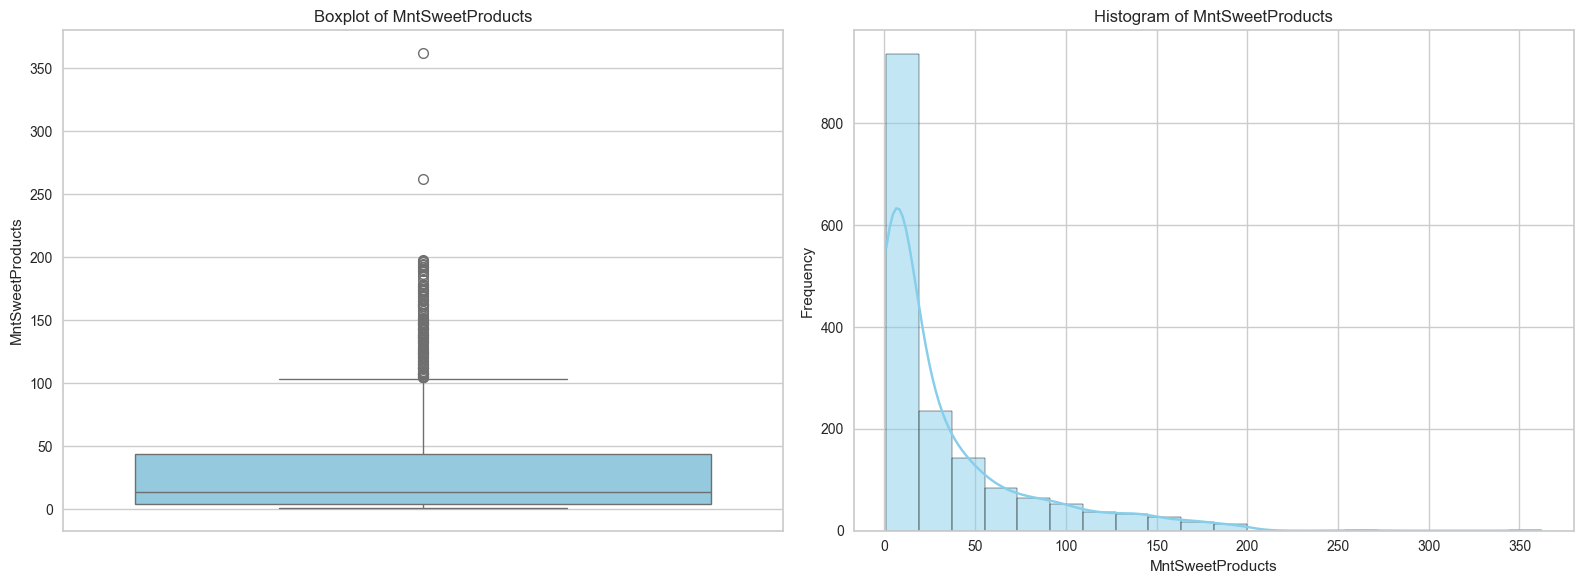

Minimum of MntSweetProducts: 1
Maximum of MntSweetProducts: 362
Mean of MntSweetProducts: 32.89
Mode of MntSweetProducts: 1 (repeated 153 times)


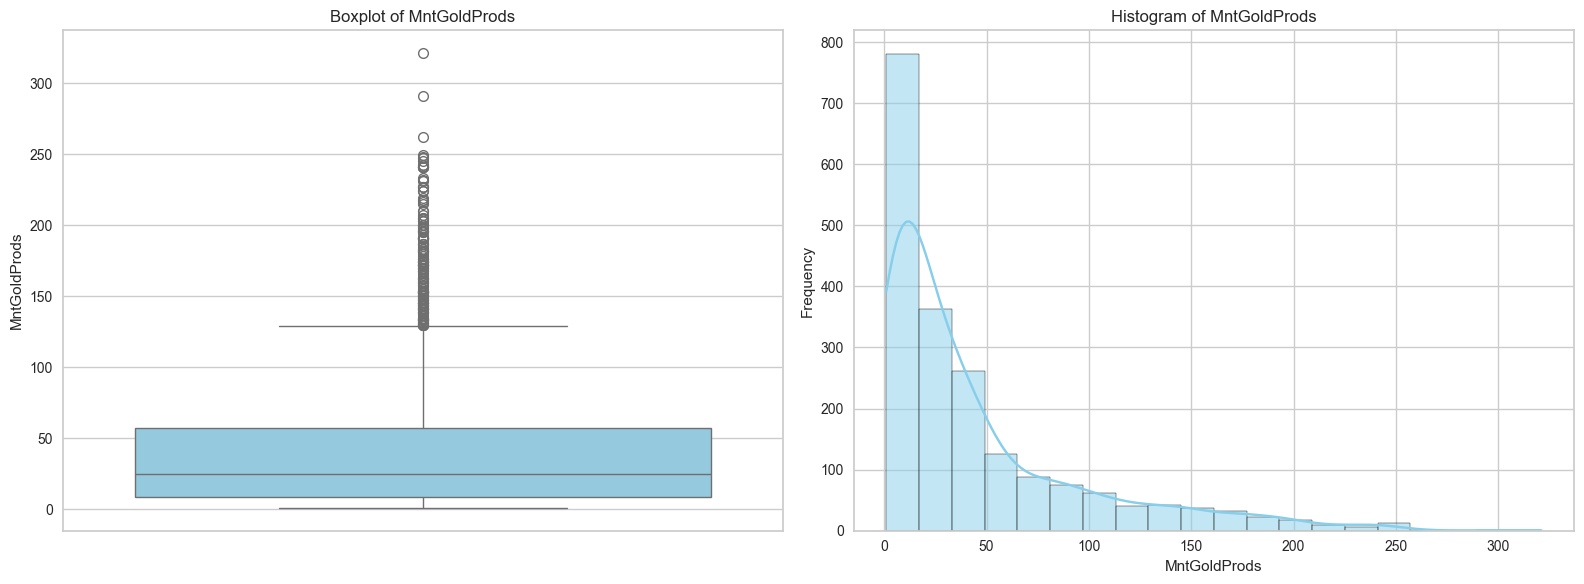

Minimum of MntGoldProds: 1
Maximum of MntGoldProds: 321
Mean of MntGoldProds: 44.45
Mode of MntGoldProds: 1 (repeated 78 times)


In [20]:
# List of product columns to generate plots for
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for product in product_columns:
    # Filtering data for values greater than 0
    filtered_data = data[data[product] > 0]
    
    min_value = filtered_data[product].min()
    max_value = filtered_data[product].max()
    mean_value = filtered_data[product].mean()
    mode_value, mode_count = stats.mode(filtered_data[product])[0][0], stats.mode(filtered_data[product])[1][0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    

    sns.boxplot(y=filtered_data[product], color="skyblue", ax=ax1)
    ax1.set_title(f'Boxplot of {product}')
    ax1.set_ylabel(product)
    

    sns.histplot(filtered_data[product], bins=20, color="skyblue", kde=True, ax=ax2)
    ax2.set_title(f'Histogram of {product}')
    ax2.set_xlabel(product)
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    

    print(f"Minimum of {product}: {min_value}")
    print(f"Maximum of {product}: {max_value}")
    print(f"Mean of {product}: {mean_value:.2f}")
    print(f"Mode of {product}: {mode_value} (repeated {mode_count} times)")

#### let's convert Dt_Customer into Days_as_customer and investigate correlations of it.

In [21]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

newest_date = data["Dt_Customer"].max()
oldest_date = data["Dt_Customer"].min()

print("The newest customer's enrolment date in the records:", newest_date.date())
print("The oldest customer's enrolment date in the records:", oldest_date.date())

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [22]:
# Defining the reference date as the newest customer's enrollment date (2014-06-29)
reference_date = pd.to_datetime('2014-12-06')

# Calculating 'Days_as_customer' as the difference in days from the reference date
data['Days_as_customer'] = (reference_date - data['Dt_Customer']).dt.days + 1  # Adding 1 to make the newest customer = 1 day
print(data[['Dt_Customer', 'Days_as_customer']].head())

  Dt_Customer  Days_as_customer
0  2012-04-09             972.0
1  2014-08-03             126.0
2         NaT               NaN
3  2014-10-02              66.0
4         NaT               NaN


In [23]:
min_days = data['Days_as_customer'].min()
max_days = data['Days_as_customer'].max()
mean_days = data['Days_as_customer'].mean()
mode_days, mode_days_count = stats.mode(data['Days_as_customer'])[0][0], stats.mode(data['Days_as_customer'])[1][0]

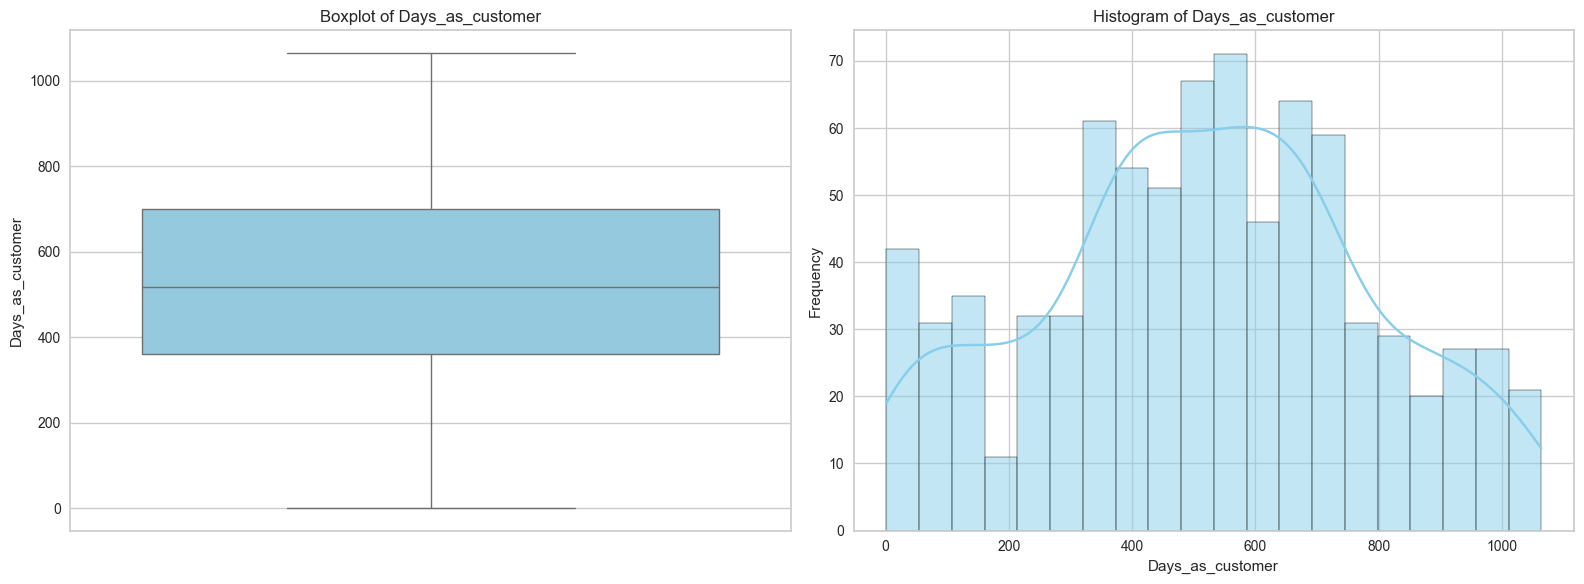

Mean of Days_as_customer: 516.61
Minimum of Days_as_customer: 1.0
Maximum of Days_as_customer: 1064.0
Mode of Days_as_customer: nan (repeated 1228 times)


In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


sns.boxplot(y=data['Days_as_customer'], color="skyblue", ax=ax1)
ax1.set_title('Boxplot of Days_as_customer')
ax1.set_ylabel('Days_as_customer')


sns.histplot(data['Days_as_customer'], bins=20, color="skyblue", kde=True, ax=ax2)
ax2.set_title('Histogram of Days_as_customer')
ax2.set_xlabel('Days_as_customer')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Mean of Days_as_customer: {mean_days:.2f}")
print(f"Minimum of Days_as_customer: {min_days}")
print(f"Maximum of Days_as_customer: {max_days}")
print(f"Mode of Days_as_customer: {mode_days} (repeated {mode_days_count} times)")

In [25]:
data['Days_as_customer']=data['Days_as_customer'].fillna(data['Days_as_customer'].mean())

# FEATURE ENGINEERING

#### In the above graphs it was clear that some distributions were skewed + had outliers. I need to run log transformation prior k-means to address this issue.

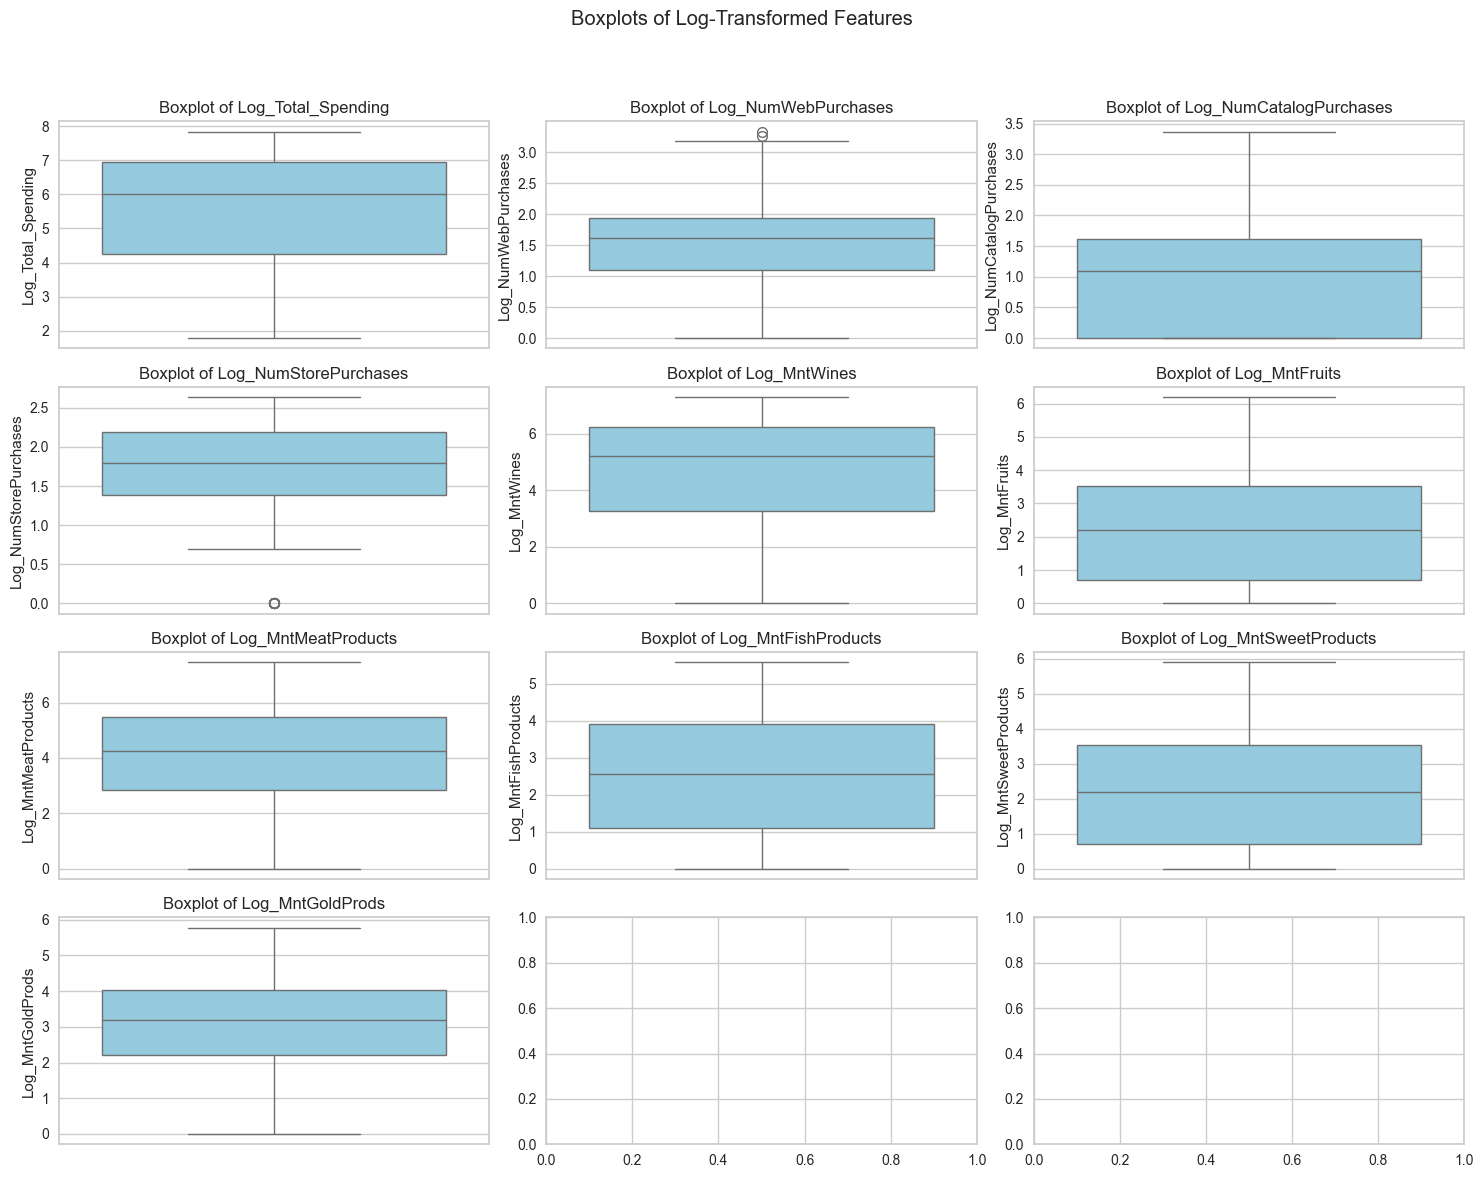

In [26]:
# Applying log transformation to relevant columns, adding 1 to avoid log(0)
data['Log_Total_Spending'] = np.log1p(data['Total Spending'])
data['Log_NumWebPurchases'] = np.log1p(data['NumWebPurchases'])
data['Log_NumCatalogPurchases'] = np.log1p(data['NumCatalogPurchases'])
data['Log_NumStorePurchases'] = np.log1p(data['NumStorePurchases'])
data['Log_MntWines'] = np.log1p(data['MntWines'])
data['Log_MntFruits'] = np.log1p(data['MntFruits'])
data['Log_MntMeatProducts'] = np.log1p(data['MntMeatProducts'])
data['Log_MntFishProducts'] = np.log1p(data['MntFishProducts'])
data['Log_MntSweetProducts'] = np.log1p(data['MntSweetProducts'])
data['Log_MntGoldProds'] = np.log1p(data['MntGoldProds'])


log_clustering_features = data[['Log_Total_Spending', 'Log_NumWebPurchases', 'Log_NumCatalogPurchases', 
                                'Log_NumStorePurchases', 'Log_MntWines', 'Log_MntFruits', 'Log_MntMeatProducts', 
                                'Log_MntFishProducts', 'Log_MntSweetProducts', 'Log_MntGoldProds']]
# Plotting boxplots for each log-transformed feature to visualize the new distribution and check for outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Boxplots of Log-Transformed Features')


axes = axes.flatten()


for i, column in enumerate(log_clustering_features.columns):
    sns.boxplot(y=log_clustering_features[column], color="skyblue", ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

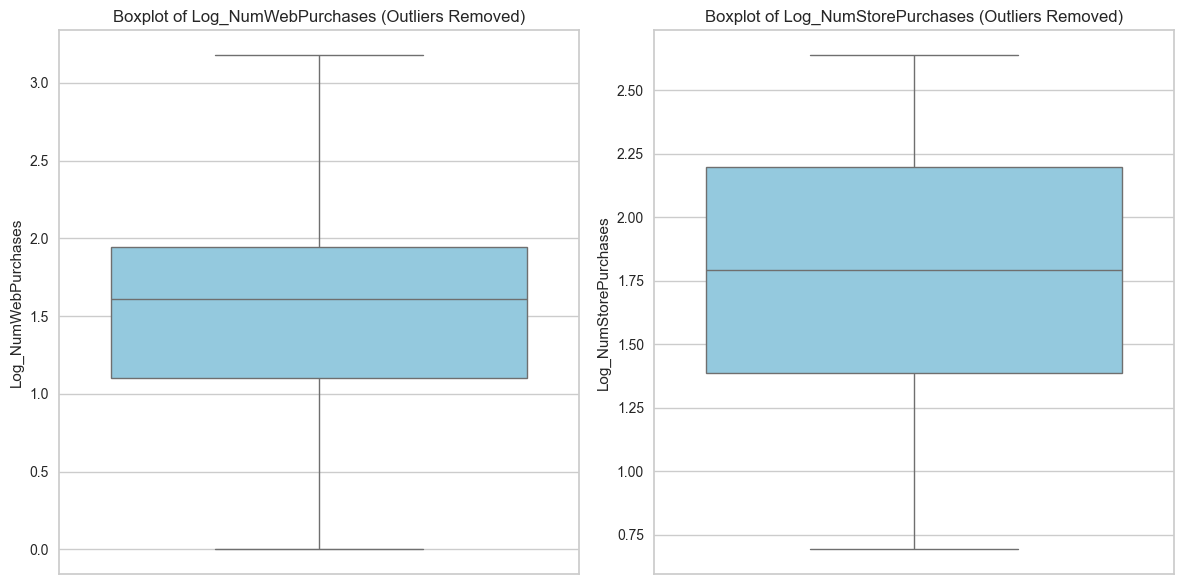

Number of customers before removing outliers: 2039
Number of customers after removing outliers: 2025


In [27]:

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


num_before = len(data)


data_cleaned = remove_outliers_iqr(data, 'Log_NumWebPurchases')
data_cleaned = remove_outliers_iqr(data_cleaned, 'Log_NumStorePurchases')


num_after = len(data_cleaned)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.boxplot(y=data_cleaned['Log_NumWebPurchases'], color="skyblue", ax=axes[0])
axes[0].set_title('Boxplot of Log_NumWebPurchases (Outliers Removed)')
axes[0].set_ylabel('Log_NumWebPurchases')


sns.boxplot(y=data_cleaned['Log_NumStorePurchases'], color="skyblue", ax=axes[1])
axes[1].set_title('Boxplot of Log_NumStorePurchases (Outliers Removed)')
axes[1].set_ylabel('Log_NumStorePurchases')

plt.tight_layout()
plt.show()

print(f"Number of customers before removing outliers: {num_before}")
print(f"Number of customers after removing outliers: {num_after}")

In [28]:
log_clustering_features = data_cleaned[['Log_Total_Spending', 'Log_NumWebPurchases', 'Log_NumCatalogPurchases', 
                                'Log_NumStorePurchases', 'Log_MntWines', 'Log_MntFruits', 'Log_MntMeatProducts', 
                                'Log_MntFishProducts', 'Log_MntSweetProducts', 'Log_MntGoldProds']]
log_clustering_features['Age'] = data_cleaned['Age']
log_clustering_features['Days_as_customer'] = data_cleaned['Days_as_customer']

In [29]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(log_clustering_features)

#### Determining the optimal number of clusters using the Elbow Method

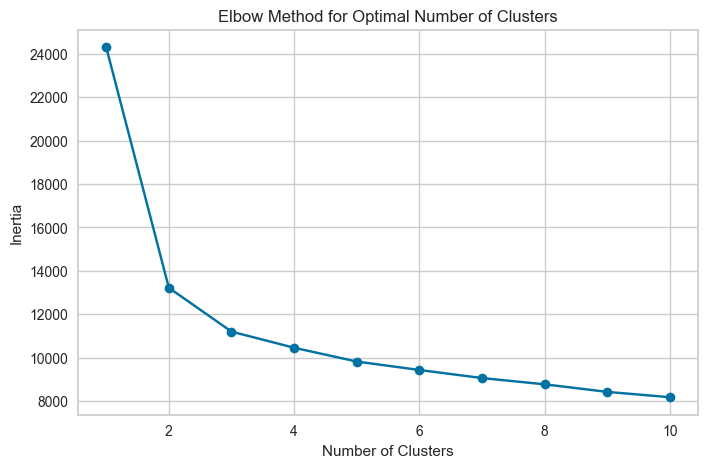

In [30]:
inertia = []
range_n_clusters = range(1, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

#### Trying k-means, DBScan and Agglomerative clustering in order to find the best performing model.

##### k-MEANS

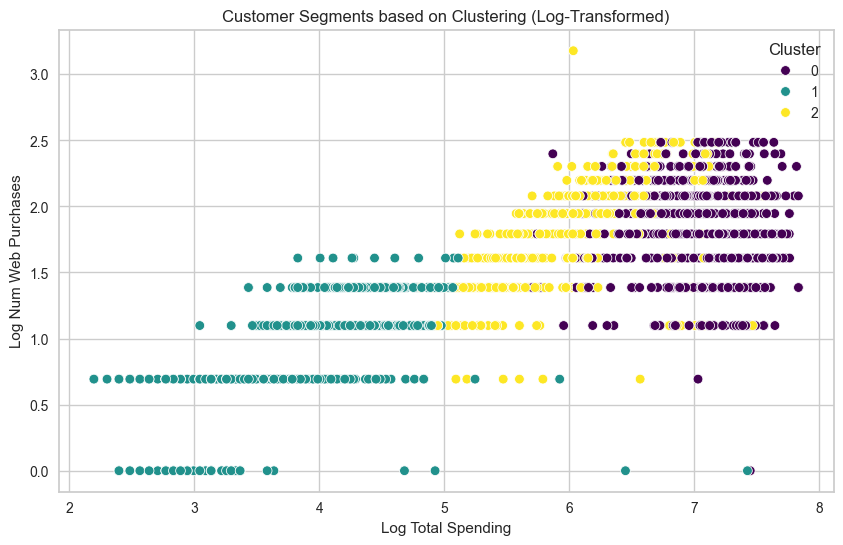

In [31]:
optimal_clusters = 3  # Based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters with Log_Total_Spending vs. Log_NumWebPurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Log_Total_Spending'], y=data_cleaned['Log_NumWebPurchases'], hue=data_cleaned['Cluster'], palette='viridis')
plt.title('Customer Segments based on Clustering (Log-Transformed)')
plt.xlabel('Log Total Spending')
plt.ylabel('Log Num Web Purchases')
plt.legend(title='Cluster')
plt.show()

##### DBScan

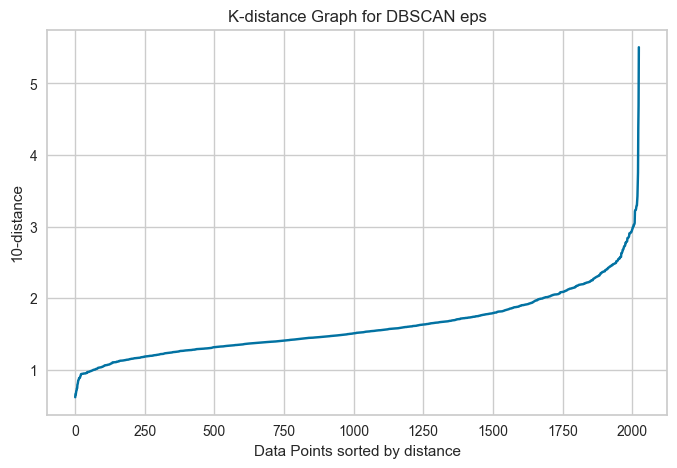

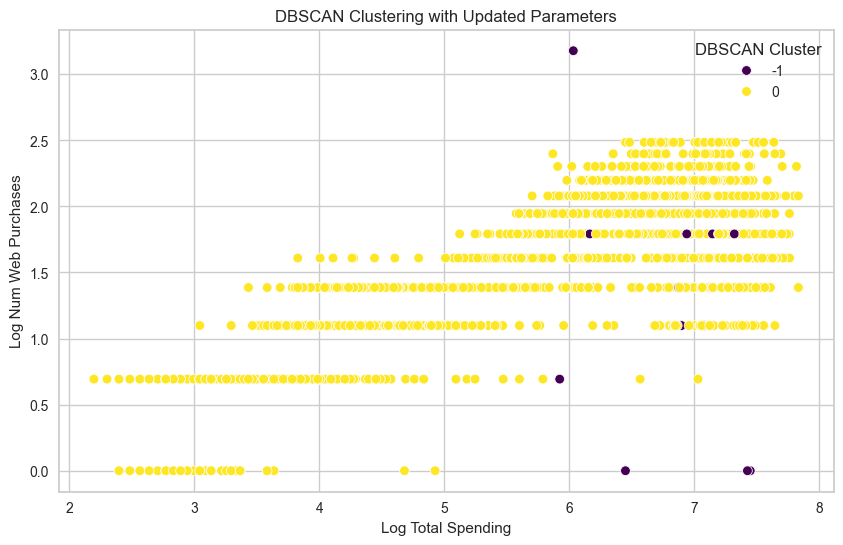

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


scaler = StandardScaler()
scaled_features = scaler.fit_transform(log_clustering_features)


k = 10  
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(scaled_features)
distances, indices = neighbors.kneighbors(scaled_features)
distances = np.sort(distances[:, k - 1], axis=0)

# Plotting k-distance graph to identify the elbow point for eps
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel(f"{k}-distance")
plt.title("K-distance Graph for DBSCAN eps")
plt.show()


eps_value = 2.5  # Set eps closer to the elbow point based on k-distance plot
min_samples_value = 10  


dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Visualizing the updated DBSCAN clusters with Log_Total_Spending vs. Log_NumWebPurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Log_Total_Spending'], y=data_cleaned['Log_NumWebPurchases'], hue=data_cleaned['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering with Updated Parameters')
plt.xlabel('Log Total Spending')
plt.ylabel('Log Num Web Purchases')
plt.legend(title='DBSCAN Cluster', loc='upper right')
plt.show()


##### Agglomerative Clustring

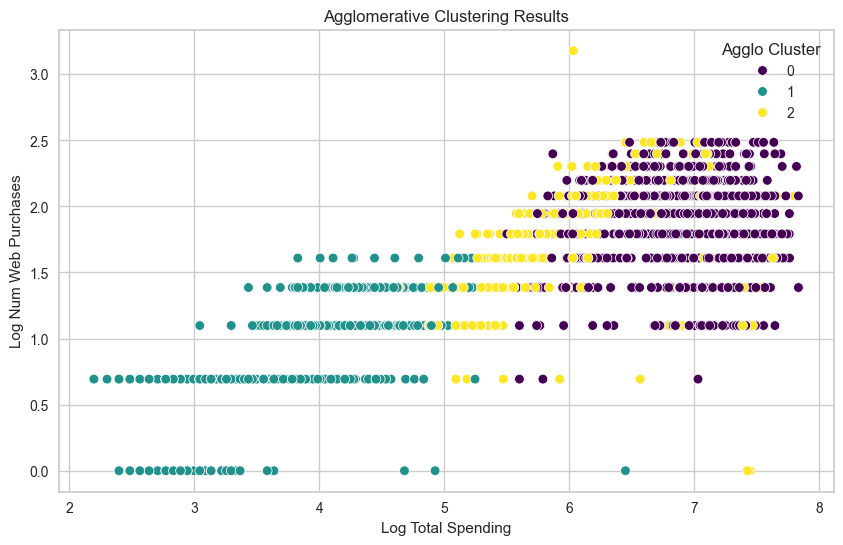

In [33]:
from sklearn.cluster import AgglomerativeClustering

scaler = StandardScaler()
scaled_features = scaler.fit_transform(log_clustering_features)

agglo = AgglomerativeClustering(n_clusters=3)  # Set number of clusters based on prior analysis or visualization
data_cleaned['Agglo_Cluster'] = agglo.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Log_Total_Spending'], y=data_cleaned['Log_NumWebPurchases'], hue=data_cleaned['Agglo_Cluster'], palette='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Log Total Spending')
plt.ylabel('Log Num Web Purchases')
plt.legend(title='Agglo Cluster')
plt.show()

#### We can Clearly see visually K-means Clustering is performing far better, so for further analysis we will stick to k-means clustering

### Type Of Product Segmentation

In [34]:
# Creating new variables to identify preferences in all categories

data_cleaned['Wine_Ratio'] = data_cleaned['Log_MntWines'] / data_cleaned['Log_Total_Spending']
data_cleaned['Fruits_Ratio'] = data_cleaned['Log_MntFruits'] / data_cleaned['Log_Total_Spending']
data_cleaned['Meat_Ratio'] = data_cleaned['Log_MntMeatProducts'] / data_cleaned['Log_Total_Spending']
data_cleaned['Fish_Ratio'] = data_cleaned['Log_MntFishProducts'] / data_cleaned['Log_Total_Spending']
data_cleaned['Sweet_Ratio'] = data_cleaned['Log_MntSweetProducts'] / data_cleaned['Log_Total_Spending']
data_cleaned['Gold_Ratio'] = data_cleaned['Log_MntGoldProds'] / data_cleaned['Log_Total_Spending']

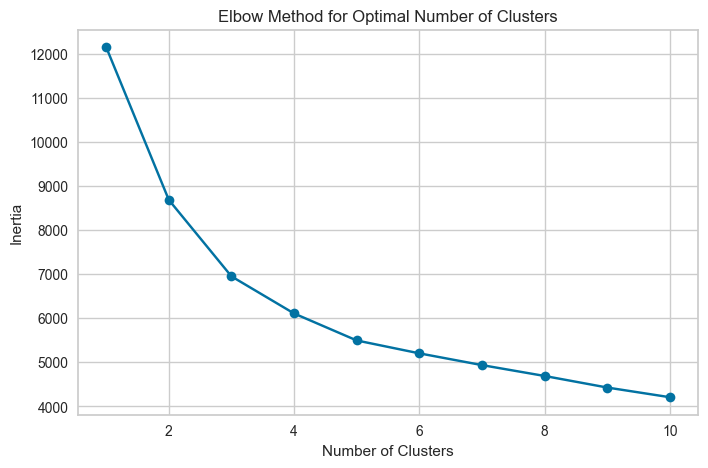

In [35]:
ratio_features = data_cleaned[['Wine_Ratio', 'Fruits_Ratio', 'Meat_Ratio', 
                                'Fish_Ratio', 'Sweet_Ratio', 'Gold_Ratio']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(ratio_features)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

#### WINE

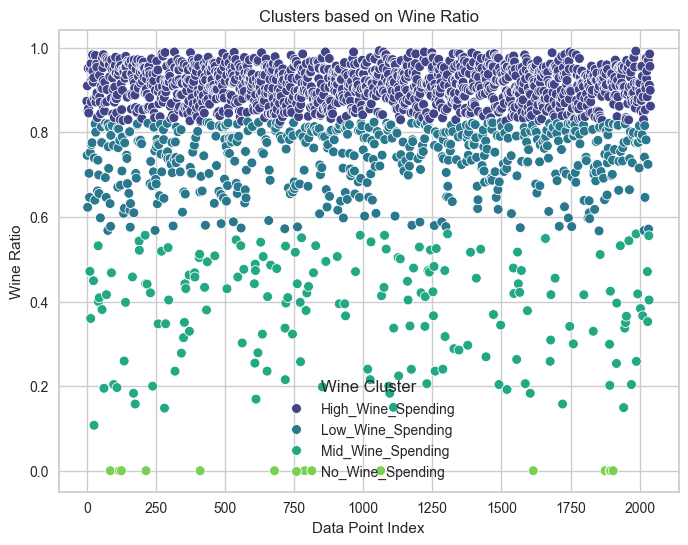

In [36]:

data_cleaned['Wine_Cluster'] = np.where(data_cleaned['Wine_Ratio'] == 0, 'No_Wine_Spending', np.nan)


non_zero_wine = data_cleaned[data_cleaned['Wine_Ratio'] > 0]
kmeans_wine = KMeans(n_clusters=3, random_state=42)
data_cleaned.loc[data_cleaned['Wine_Ratio'] > 0, 'Wine_Cluster'] = kmeans_wine.fit_predict(non_zero_wine[['Wine_Ratio']])


wine_cluster_labels = {0: 'Low_Wine_Spending', 1: 'Mid_Wine_Spending', 2: 'High_Wine_Spending'}
data_cleaned['Wine_Cluster'] = data_cleaned['Wine_Cluster'].replace(wine_cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Wine_Ratio'], hue=data_cleaned['Wine_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Wine Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Wine Ratio')
plt.legend(title='Wine Cluster', loc='best')
plt.show()

In [37]:
# Apply one-hot encoding directly to the 'Wine_Cluster' column with descriptive labels
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Wine_Cluster'], prefix='Wine_Cluster').astype(int)

data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)

data_cleaned.drop('Wine_Cluster', axis=1, inplace=True)

data_cleaned.filter(regex='^Wine_Cluster').head()

Wine_Cluster_High_Wine_Spending  Wine_Cluster_Low_Wine_Spending  \
0                                1                               0   
1                                0                               1   
2                                1                               0   
3                                0                               1   
4                                1                               0   

   Wine_Cluster_Mid_Wine_Spending  Wine_Cluster_No_Wine_Spending  
0                               0                              0  
1                               0                              0  
2                               0                              0  
3                               0                              0  
4                               0                              0

#### Fruits

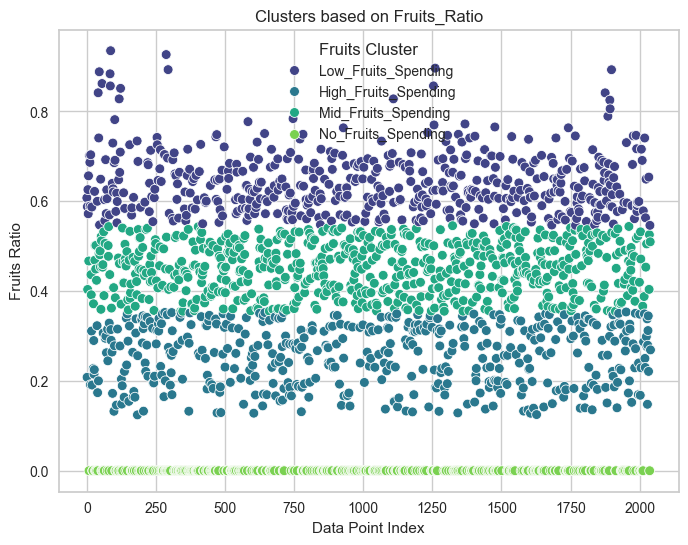

In [38]:
 # Create a separate cluster for clients who do not purchase fruits (Fruits_Ratio = 0)
data_cleaned['Fruits_Cluster'] = np.where(data_cleaned['Fruits_Ratio'] == 0, 'No_Fruits_Spending', np.nan)

# Apply KMeans only to clients who have non-zero fruit spending
non_zero_fruits = data_cleaned[data_cleaned['Fruits_Ratio'] > 0]
kmeans_fruits = KMeans(n_clusters=3, random_state=42)
data_cleaned.loc[data_cleaned['Fruits_Ratio'] > 0, 'Fruits_Cluster'] = kmeans_fruits.fit_predict(non_zero_fruits[['Fruits_Ratio']])

# Map numerical clusters to descriptive labels
fruits_cluster_labels = {0: 'Low_Fruits_Spending', 1: 'Mid_Fruits_Spending', 2: 'High_Fruits_Spending'}
data_cleaned['Fruits_Cluster'] = data_cleaned['Fruits_Cluster'].replace(fruits_cluster_labels)

# Scatterplot for Fruits_Ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Fruits_Ratio'], hue=data_cleaned['Fruits_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Fruits_Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Fruits Ratio')
plt.legend(title='Fruits Cluster', loc='best')
plt.show()

In [39]:
# Apply one-hot encoding directly to the 'Fruits_Cluster' column with descriptive labels
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Fruits_Cluster'], prefix='Fruits_Cluster').astype(int)

data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)

data_cleaned.drop('Fruits_Cluster', axis=1, inplace=True)

data_cleaned.filter(regex='^Fruits_Cluster').head()

Fruits_Cluster_High_Fruits_Spending  Fruits_Cluster_Low_Fruits_Spending  \
0                                    0                                   1   
1                                    1                                   0   
2                                    0                                   1   
3                                    0                                   0   
4                                    0                                   1   

   Fruits_Cluster_Mid_Fruits_Spending  Fruits_Cluster_No_Fruits_Spending  
0                                   0                                  0  
1                                   0                                  0  
2                                   0                                  0  
3                                   1                                  0  
4                                   0                                  0

#### Meat

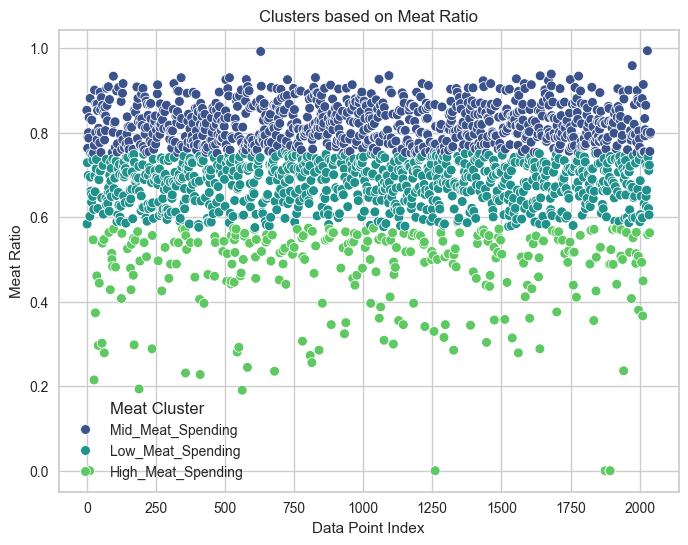

In [40]:
kmeans_meat = KMeans(n_clusters=3, random_state=42)
data_cleaned['Meat_Cluster'] = kmeans_meat.fit_predict(data_cleaned[['Meat_Ratio']])

meat_cluster_labels = {0: 'Low_Meat_Spending', 1: 'Mid_Meat_Spending', 2: 'High_Meat_Spending'}
data_cleaned['Meat_Cluster'] = data_cleaned['Meat_Cluster'].replace(meat_cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Meat_Ratio'], hue=data_cleaned['Meat_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Meat Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Meat Ratio')
plt.legend(title='Meat Cluster', loc='best')
plt.show()

In [41]:
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Meat_Cluster'], prefix='Meat_Cluster').astype(int)
data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)
data_cleaned.drop('Meat_Cluster', axis=1, inplace=True)

data_cleaned.filter(regex='^Meat_Cluster').head()

Meat_Cluster_High_Meat_Spending  Meat_Cluster_Low_Meat_Spending  \
0                                0                               0   
1                                0                               1   
2                                0                               1   
3                                0                               0   
4                                0                               0   

   Meat_Cluster_Mid_Meat_Spending  
0                               1  
1                               0  
2                               0  
3                               1  
4                               1

#### Fish

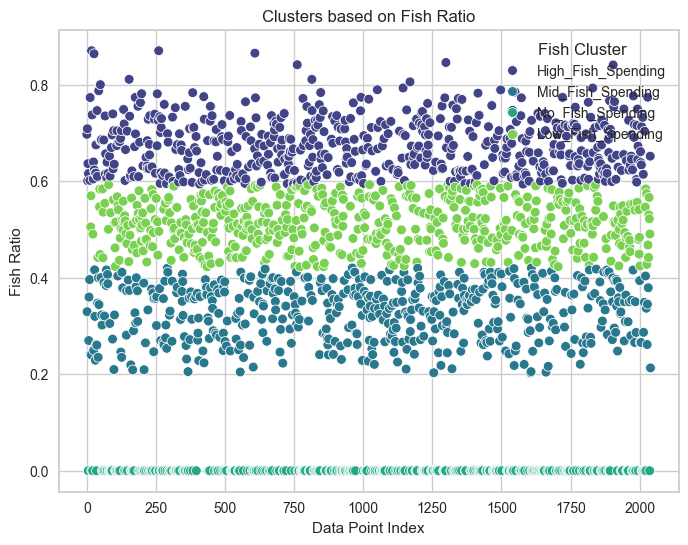

In [42]:

data_cleaned['Fish_Cluster'] = np.where(data_cleaned['Fish_Ratio'] == 0, 'No_Fish_Spending', np.nan)


non_zero_fish = data_cleaned[data_cleaned['Fish_Ratio'] > 0]
kmeans_fish = KMeans(n_clusters=3, random_state=42)
data_cleaned.loc[data_cleaned['Fish_Ratio'] > 0, 'Fish_Cluster'] = kmeans_fish.fit_predict(non_zero_fish[['Fish_Ratio']])

fish_cluster_labels = {0: 'Low_Fish_Spending', 1: 'Mid_Fish_Spending', 2: 'High_Fish_Spending'}
data_cleaned['Fish_Cluster'] = data_cleaned['Fish_Cluster'].replace(fish_cluster_labels)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Fish_Ratio'], hue=data_cleaned['Fish_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Fish Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Fish Ratio')
plt.legend(title='Fish Cluster', loc='best')
plt.show()

In [43]:
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Fish_Cluster'], prefix='Fish_Cluster').astype(int)


data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)


data_cleaned.drop('Fish_Cluster', axis=1, inplace=True)

data_cleaned.filter(regex='^Fish_Cluster').head()

Fish_Cluster_High_Fish_Spending  Fish_Cluster_Low_Fish_Spending  \
0                                1                               0   
1                                0                               0   
2                                1                               0   
3                                1                               0   
4                                1                               0   

   Fish_Cluster_Mid_Fish_Spending  Fish_Cluster_No_Fish_Spending  
0                               0                              0  
1                               1                              0  
2                               0                              0  
3                               0                              0  
4                               0                              0

#### Sweet

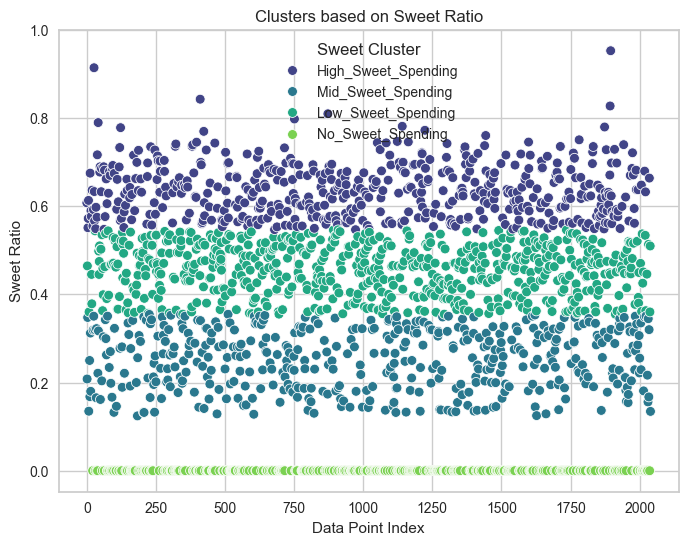

In [44]:
data_cleaned['Sweet_Cluster'] = np.where(data_cleaned['Sweet_Ratio'] == 0, 'No_Sweet_Spending', np.nan)


non_zero_sweet = data_cleaned[data_cleaned['Sweet_Ratio'] > 0]
kmeans_sweet = KMeans(n_clusters=3, random_state=42)
data_cleaned.loc[data_cleaned['Sweet_Ratio'] > 0, 'Sweet_Cluster'] = kmeans_sweet.fit_predict(non_zero_sweet[['Sweet_Ratio']])


sweet_cluster_labels = {0: 'Low_Sweet_Spending', 1: 'Mid_Sweet_Spending', 2: 'High_Sweet_Spending'}
data_cleaned['Sweet_Cluster'] = data_cleaned['Sweet_Cluster'].replace(sweet_cluster_labels)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Sweet_Ratio'], hue=data_cleaned['Sweet_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Sweet Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Sweet Ratio')
plt.legend(title='Sweet Cluster', loc='best')
plt.show()

In [45]:
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Sweet_Cluster'], prefix='Sweet_Cluster').astype(int)
data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)
data_cleaned.drop('Sweet_Cluster', axis=1, inplace=True)
data_cleaned.filter(regex='^Sweet_Cluster').head()

Sweet_Cluster_High_Sweet_Spending  Sweet_Cluster_Low_Sweet_Spending  \
0                                  1                                 0   
1                                  0                                 0   
2                                  0                                 1   
3                                  0                                 0   
4                                  1                                 0   

   Sweet_Cluster_Mid_Sweet_Spending  Sweet_Cluster_No_Sweet_Spending  
0                                 0                                0  
1                                 1                                0  
2                                 0                                0  
3                                 1                                0  
4                                 0                                0

#### Gold

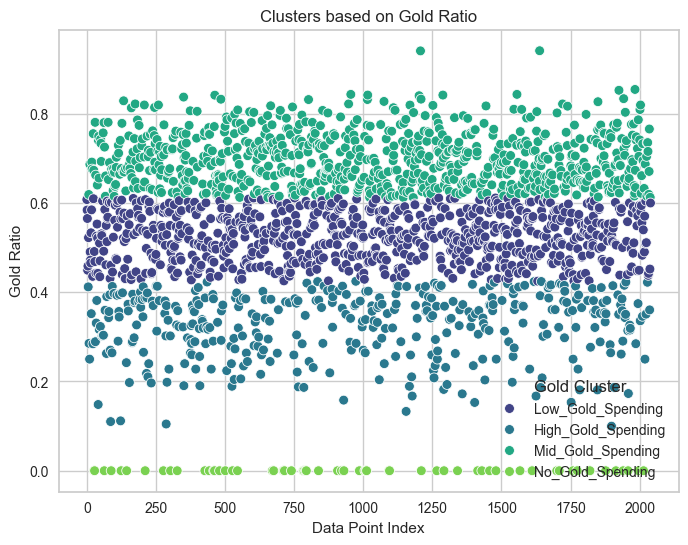

In [46]:
data_cleaned['Gold_Cluster'] = np.where(data_cleaned['Gold_Ratio'] == 0, 'No_Gold_Spending', np.nan)

non_zero_gold = data_cleaned[data_cleaned['Gold_Ratio'] > 0]
kmeans_gold = KMeans(n_clusters=3, random_state=42)
data_cleaned.loc[data_cleaned['Gold_Ratio'] > 0, 'Gold_Cluster'] = kmeans_gold.fit_predict(non_zero_gold[['Gold_Ratio']])

gold_cluster_labels = {0: 'Low_Gold_Spending', 1: 'Mid_Gold_Spending', 2: 'High_Gold_Spending'}
data_cleaned['Gold_Cluster'] = data_cleaned['Gold_Cluster'].replace(gold_cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Gold_Ratio'], hue=data_cleaned['Gold_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Gold Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Gold Ratio')
plt.legend(title='Gold Cluster', loc='best')
plt.show()

In [47]:
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Gold_Cluster'], prefix='Gold_Cluster').astype(int)
data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)
data_cleaned.drop('Gold_Cluster', axis=1, inplace=True)
data_cleaned.filter(regex='^Gold_Cluster').head()

Gold_Cluster_High_Gold_Spending  Gold_Cluster_Low_Gold_Spending  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4                                0                               1   

   Gold_Cluster_Mid_Gold_Spending  Gold_Cluster_No_Gold_Spending  
0                               0                              0  
1                               0                              0  
2                               0                              0  
3                               0                              0  
4                               0                              0

#### Purchasing Place : Store , Web , Catalog

In [48]:
data_cleaned['Total_Purchases'] = data_cleaned['NumWebPurchases'] + data_cleaned['NumCatalogPurchases'] + data_cleaned['NumStorePurchases']
data_cleaned['Store_Ratio'] = data_cleaned['NumStorePurchases'] / data_cleaned['Total_Purchases']
data_cleaned['Web_Ratio'] = data_cleaned['NumWebPurchases'] / data_cleaned['Total_Purchases']
data_cleaned['Catalog_Ratio'] = data_cleaned['NumCatalogPurchases'] / data_cleaned['Total_Purchases']
data_cleaned[['Store_Ratio', 'Web_Ratio', 'Catalog_Ratio']] = data_cleaned[['Store_Ratio', 'Web_Ratio', 'Catalog_Ratio']].fillna(0)
data_cleaned[['Store_Ratio', 'Web_Ratio', 'Catalog_Ratio']].head()

Store_Ratio  Web_Ratio  Catalog_Ratio
0     0.181818   0.363636       0.454545
1     0.500000   0.250000       0.250000
2     0.500000   0.400000       0.100000
3     0.666667   0.333333       0.000000
4     0.428571   0.357143       0.214286

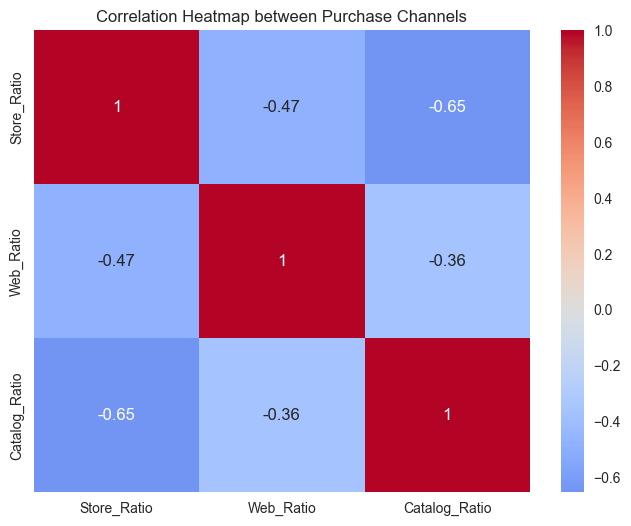

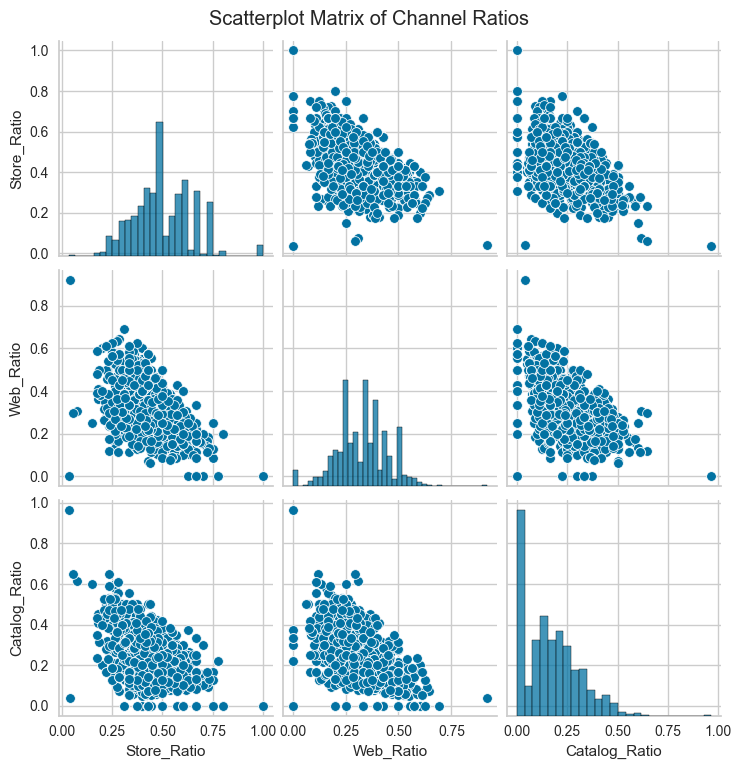

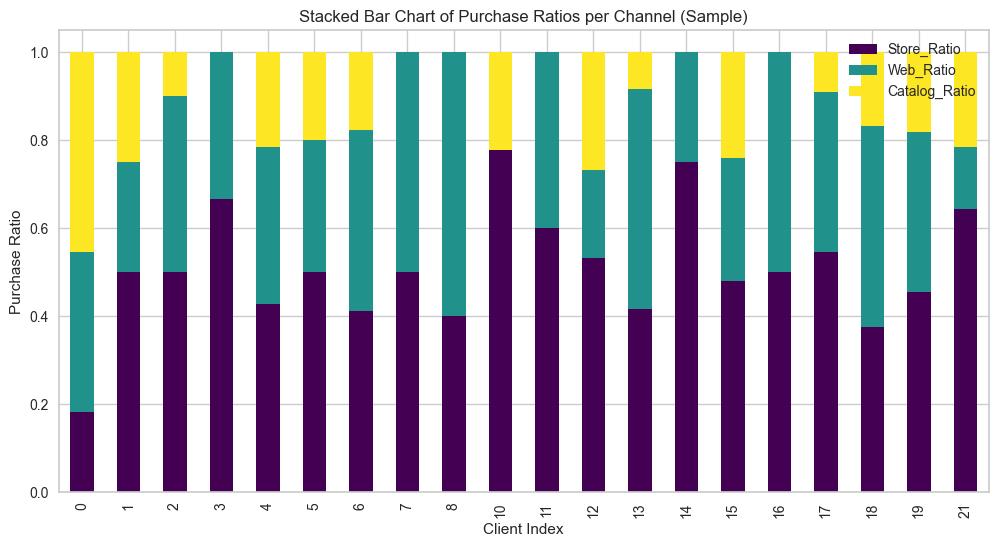

In [49]:
ratios = data_cleaned[['Store_Ratio', 'Web_Ratio', 'Catalog_Ratio']]

# Heatmap for correlations between channels
plt.figure(figsize=(8, 6))
sns.heatmap(ratios.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Purchase Channels')
plt.show()

# Scatterplot matrix to visualize relationship between channels
sns.pairplot(ratios)
plt.suptitle('Scatterplot Matrix of Channel Ratios', y=1.02)
plt.show()

# Stacked bar chart (first 20 clients for visibility)
ratios.iloc[:20].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Purchase Ratios per Channel (Sample)')
plt.xlabel('Client Index')
plt.ylabel('Purchase Ratio')
plt.legend(loc='best')
plt.show()

#### Means directly to Store_Purchases_Ratio

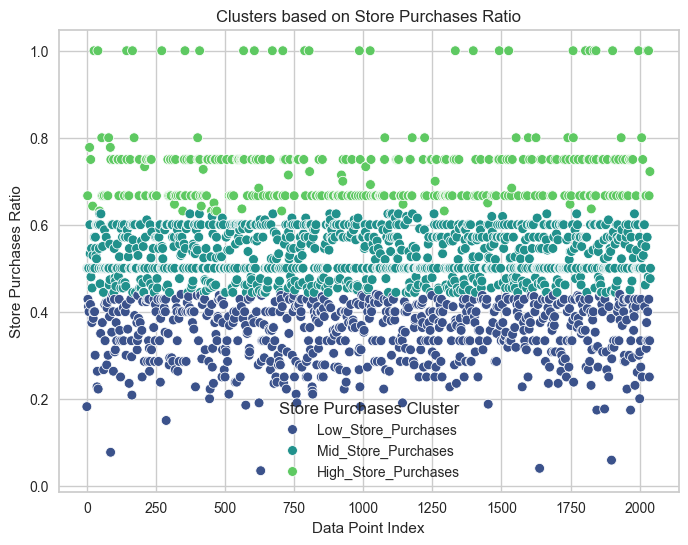

In [50]:
kmeans_store = KMeans(n_clusters=3, random_state=42)
data_cleaned['Store_Purchases_Cluster'] = kmeans_store.fit_predict(data_cleaned[['Store_Ratio']])

store_cluster_labels = {0: 'Low_Store_Purchases', 1: 'Mid_Store_Purchases', 2: 'High_Store_Purchases'}
data_cleaned['Store_Purchases_Cluster'] = data_cleaned['Store_Purchases_Cluster'].replace(store_cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Store_Ratio'], hue=data_cleaned['Store_Purchases_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Store Purchases Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Store Purchases Ratio')
plt.legend(title='Store Purchases Cluster', loc='best')
plt.show()

In [51]:
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Store_Purchases_Cluster'], prefix='Store_Purchases_Cluster').astype(int)
data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)
data_cleaned.drop('Store_Purchases_Cluster', axis=1, inplace=True)
data_cleaned.filter(regex='^Store_Purchases_Cluster').head()

Store_Purchases_Cluster_High_Store_Purchases  \
0                                             0   
1                                             0   
2                                             0   
3                                             1   
4                                             0   

   Store_Purchases_Cluster_Low_Store_Purchases  \
0                                            1   
1                                            0   
2                                            0   
3                                            0   
4                                            1   

   Store_Purchases_Cluster_Mid_Store_Purchases  
0                                            0  
1                                            1  
2                                            1  
3                                            0  
4                                            0

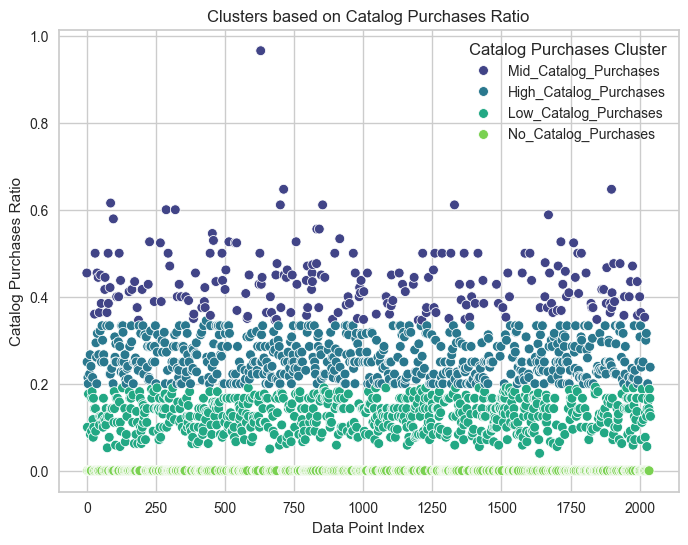

In [52]:
data_cleaned['Catalog_Purchases_Cluster'] = np.where(data_cleaned['Catalog_Ratio'] == 0, 'No_Catalog_Purchases', np.nan)
non_zero_catalog = data_cleaned[data_cleaned['Catalog_Ratio'] > 0]
kmeans_catalog = KMeans(n_clusters=3, random_state=42)
data_cleaned.loc[data_cleaned['Catalog_Ratio'] > 0, 'Catalog_Purchases_Cluster'] = kmeans_catalog.fit_predict(non_zero_catalog[['Catalog_Ratio']])

catalog_cluster_labels = {0: 'Low_Catalog_Purchases', 1: 'Mid_Catalog_Purchases', 2: 'High_Catalog_Purchases'}
data_cleaned['Catalog_Purchases_Cluster'] = data_cleaned['Catalog_Purchases_Cluster'].replace(catalog_cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Catalog_Ratio'], hue=data_cleaned['Catalog_Purchases_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Catalog Purchases Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Catalog Purchases Ratio')
plt.legend(title='Catalog Purchases Cluster', loc='best')
plt.show()

In [53]:
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Catalog_Purchases_Cluster'], prefix='Catalog_Purchases_Cluster').astype(int)
data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)
data_cleaned.drop('Catalog_Purchases_Cluster', axis=1, inplace=True)
data_cleaned.filter(regex='^Catalog_Purchases_Cluster').head()

Catalog_Purchases_Cluster_High_Catalog_Purchases  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 1   

   Catalog_Purchases_Cluster_Low_Catalog_Purchases  \
0                                                0   
1                                                0   
2                                                1   
3                                                0   
4                                                0   

   Catalog_Purchases_Cluster_Mid_Catalog_Purchases  \
0                                                1   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Catalog_Purchases_Cluster_No_Catalog_Purchases  
0                                               0  
1                                               0  
2                                               0  
3                                               1  
4                                               0

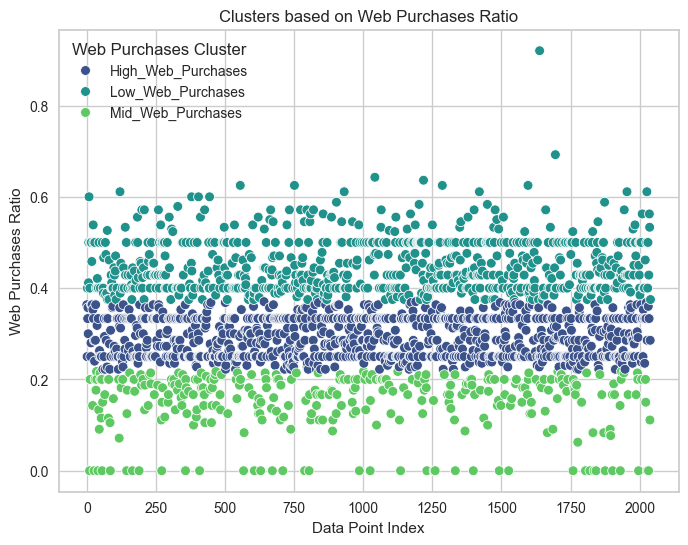

In [54]:

kmeans_web = KMeans(n_clusters=3, random_state=42)
data_cleaned['Web_Purchases_Cluster'] = kmeans_web.fit_predict(data_cleaned[['Web_Ratio']])


web_cluster_labels = {0: 'Low_Web_Purchases', 1: 'Mid_Web_Purchases', 2: 'High_Web_Purchases'}
data_cleaned['Web_Purchases_Cluster'] = data_cleaned['Web_Purchases_Cluster'].replace(web_cluster_labels)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Web_Ratio'], hue=data_cleaned['Web_Purchases_Cluster'], palette='viridis', s=50)
plt.title('Clusters based on Web Purchases Ratio')
plt.xlabel('Data Point Index')
plt.ylabel('Web Purchases Ratio')
plt.legend(title='Web Purchases Cluster', loc='best')
plt.show()

In [55]:

one_hot_wine_cluster = pd.get_dummies(data_cleaned['Web_Purchases_Cluster'], prefix='Web_Purchases_Cluster').astype(int)

data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)

data_cleaned.drop('Web_Purchases_Cluster', axis=1, inplace=True)

data_cleaned.filter(regex='^Web_Purchases_Cluster').head()

Web_Purchases_Cluster_High_Web_Purchases  \
0                                         1   
1                                         1   
2                                         0   
3                                         1   
4                                         1   

   Web_Purchases_Cluster_Low_Web_Purchases  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   Web_Purchases_Cluster_Mid_Web_Purchases  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

#### Creating clusters for discount purchases

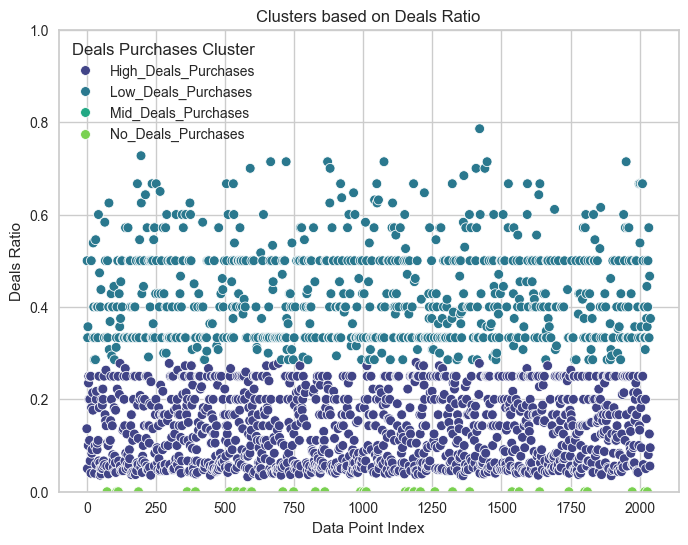

In [58]:
data_cleaned['Deals_Ratio'] = data_cleaned['NumDealsPurchases'] / data_cleaned['Total_Purchases']


data_cleaned['Deals_Purchases_Cluster'] = np.where(data_cleaned['Deals_Ratio'] == 0, 'No_Deals_Purchases', np.nan)


non_zero_deals = data_cleaned[data_cleaned['Deals_Ratio'] > 0]
kmeans_deals = KMeans(n_clusters=3, random_state=42)
data_cleaned.loc[data_cleaned['Deals_Ratio'] > 0, 'Deals_Purchases_Cluster'] = kmeans_deals.fit_predict(non_zero_deals[['Deals_Ratio']])

deals_cluster_labels = {0: 'Low_Deals_Purchases', 1: 'Mid_Deals_Purchases', 2: 'High_Deals_Purchases'}
data_cleaned['Deals_Purchases_Cluster'] = data_cleaned['Deals_Purchases_Cluster'].replace(deals_cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.index, y=data_cleaned['Deals_Ratio'], hue=data_cleaned['Deals_Purchases_Cluster'], palette='viridis', s=50 )
plt.title('Clusters based on Deals Ratio')
plt.ylim(0, 1)
plt.xlabel('Data Point Index')
plt.ylabel('Deals Ratio')
plt.legend(title='Deals Purchases Cluster', loc='best')
plt.show()

In [59]:
one_hot_wine_cluster = pd.get_dummies(data_cleaned['Deals_Purchases_Cluster'], prefix='Deals_Purchases_Cluster').astype(int)
data_cleaned = pd.concat([data_cleaned, one_hot_wine_cluster], axis=1)
data_cleaned.drop('Deals_Purchases_Cluster', axis=1, inplace=True)
data_cleaned.filter(regex='^Deals_Purchases_Cluster').head()

Deals_Purchases_Cluster_High_Deals_Purchases  \
0                                             1   
1                                             0   
2                                             1   
3                                             0   
4                                             0   

   Deals_Purchases_Cluster_Low_Deals_Purchases  \
0                                            0   
1                                            1   
2                                            0   
3                                            1   
4                                            1   

   Deals_Purchases_Cluster_Mid_Deals_Purchases  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Deals_Purchases_Cluster_No_Deals_Purchases  
0                                           0  
1                                           0  
2                                           0  
3                                           0  
4                                           0

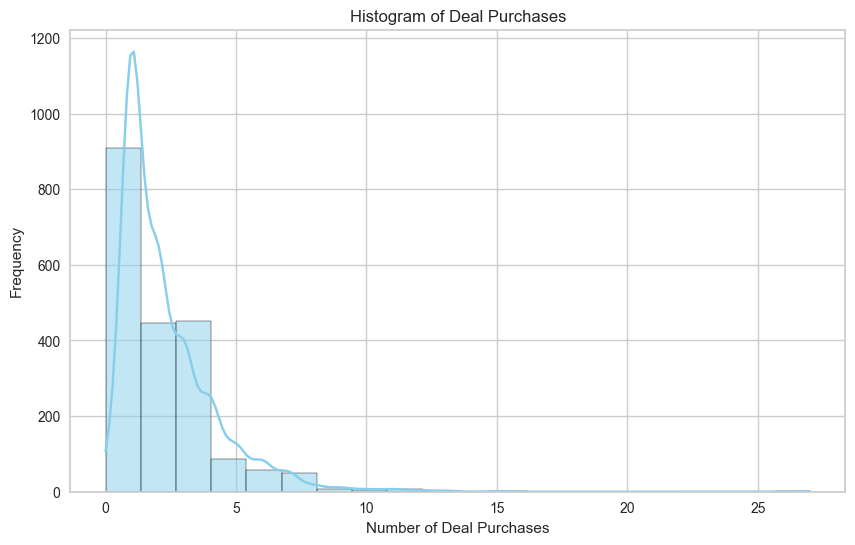

In [60]:
# Plotting histogram for NumDealsPurchases
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['NumDealsPurchases'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Deal Purchases')
plt.xlabel('Number of Deal Purchases')
plt.ylabel('Frequency')
plt.show()

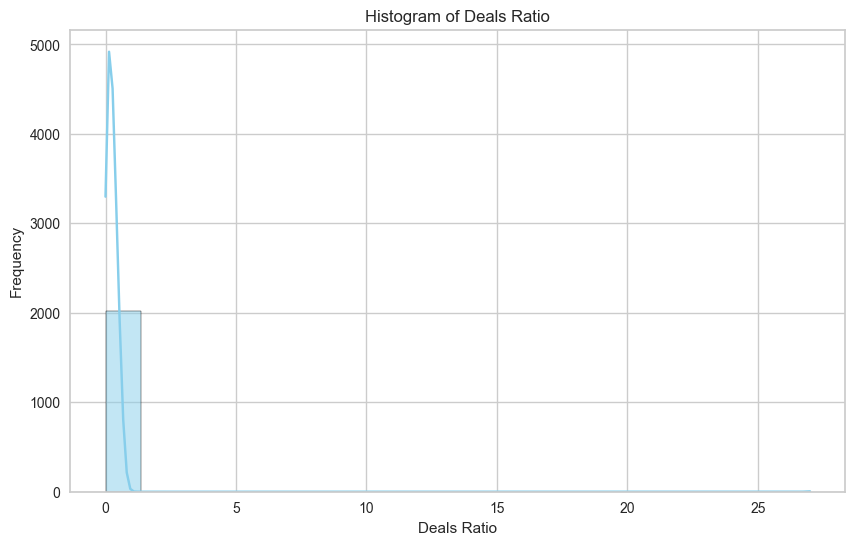

In [66]:
data_cleaned['Deals_Ratio'] = data_cleaned['NumDealsPurchases'] / data_cleaned['Total_Purchases']

data_cleaned['Deals_Ratio'] = data_cleaned['Deals_Ratio'].fillna(0)

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Deals_Ratio'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Deals Ratio')
plt.xlabel('Deals Ratio')
plt.ylabel('Frequency')
plt.show()

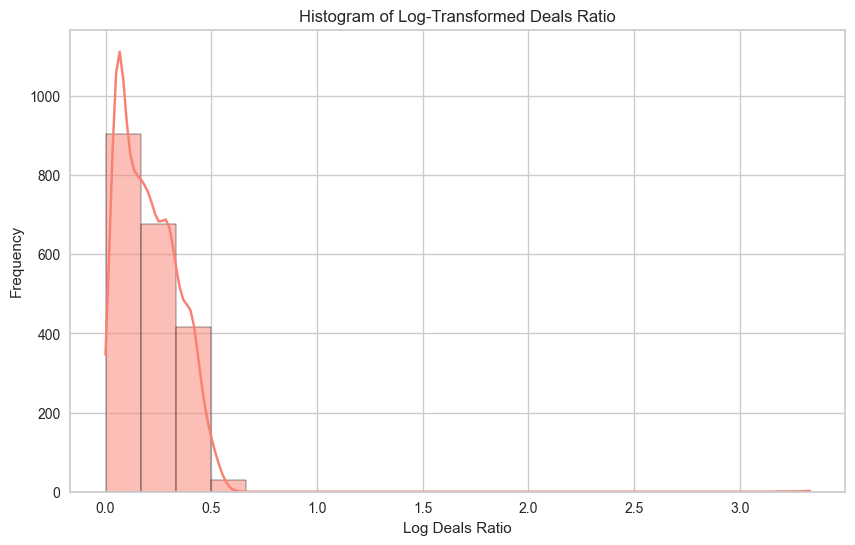

In [65]:
# Apply log transformation to Deals Ratio to handle skewness
data_cleaned['Log_Deals_Ratio'] = np.log1p(data_cleaned['Deals_Ratio'])

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Log_Deals_Ratio'], bins=20, kde=True, color='salmon')
plt.title('Histogram of Log-Transformed Deals Ratio')
plt.xlabel('Log Deals Ratio')
plt.ylabel('Frequency')
plt.show()

#### FINAL CLEANED_DATA

In [67]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 0 to 2039
Data columns (total 88 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Unnamed: 0                                        2025 non-null   int64         
 1   ID                                                2025 non-null   int64         
 2   Year_Birth                                        2025 non-null   int64         
 3   Dt_Customer                                       807 non-null    datetime64[ns]
 4   Recency                                           2025 non-null   int64         
 5   MntWines                                          2025 non-null   int64         
 6   MntFruits                                         2025 non-null   int64         
 7   MntMeatProducts                                   2025 non-null   int64         
 8   MntFishProducts                  

In [68]:
# Selecting features for segmentation
selected_columns = [
    'ID', 'Wine_Cluster_High_Wine_Spending', 'Wine_Cluster_Low_Wine_Spending', 'Wine_Cluster_Mid_Wine_Spending', 'Wine_Cluster_No_Wine_Spending',
    'Fruits_Cluster_High_Fruits_Spending', 'Fruits_Cluster_Low_Fruits_Spending', 'Fruits_Cluster_Mid_Fruits_Spending', 'Fruits_Cluster_No_Fruits_Spending',
    'Meat_Cluster_High_Meat_Spending', 'Meat_Cluster_Low_Meat_Spending', 'Meat_Cluster_Mid_Meat_Spending',
    'Fish_Cluster_High_Fish_Spending', 'Fish_Cluster_Low_Fish_Spending', 'Fish_Cluster_Mid_Fish_Spending', 'Fish_Cluster_No_Fish_Spending',
    'Sweet_Cluster_High_Sweet_Spending', 'Sweet_Cluster_Low_Sweet_Spending', 'Sweet_Cluster_Mid_Sweet_Spending', 'Sweet_Cluster_No_Sweet_Spending',
    'Gold_Cluster_High_Gold_Spending', 'Gold_Cluster_Low_Gold_Spending', 'Gold_Cluster_Mid_Gold_Spending', 'Gold_Cluster_No_Gold_Spending',
    'Store_Purchases_Cluster_High_Store_Purchases', 'Store_Purchases_Cluster_Low_Store_Purchases', 'Store_Purchases_Cluster_Mid_Store_Purchases',
    'Web_Purchases_Cluster_High_Web_Purchases', 'Web_Purchases_Cluster_Low_Web_Purchases', 'Web_Purchases_Cluster_Mid_Web_Purchases',
    'Catalog_Purchases_Cluster_High_Catalog_Purchases', 'Catalog_Purchases_Cluster_Low_Catalog_Purchases', 'Catalog_Purchases_Cluster_Mid_Catalog_Purchases', 'Catalog_Purchases_Cluster_No_Catalog_Purchases',
    'Deals_Purchases_Cluster_High_Deals_Purchases', 'Deals_Purchases_Cluster_Low_Deals_Purchases', 'Deals_Purchases_Cluster_Mid_Deals_Purchases', 'Deals_Purchases_Cluster_No_Deals_Purchases'
]

data_customer_profile = data_cleaned[selected_columns]

In [69]:
# Group by only high levels for channels and product categories to focus on significant segments
channel_product_combinations_high = data_customer_profile.groupby(
    [
        'Store_Purchases_Cluster_High_Store_Purchases', 
        'Web_Purchases_Cluster_High_Web_Purchases', 
        'Catalog_Purchases_Cluster_High_Catalog_Purchases', 
        'Meat_Cluster_High_Meat_Spending', 
        'Wine_Cluster_High_Wine_Spending', 
        'Fruits_Cluster_High_Fruits_Spending', 
        'Fish_Cluster_High_Fish_Spending', 
        'Sweet_Cluster_High_Sweet_Spending', 
        'Gold_Cluster_High_Gold_Spending'
    ]
).size().reset_index(name='count')

# Sort by count to identify the largest segments
top_high_segments = channel_product_combinations_high.sort_values(by='count', ascending=False).head(10)

# Display the top high-spending segments with explanations
print("Top segments with explanations:\n")
for index, row in top_high_segments.iterrows():
    explanation = []
    # Check each channel and add explanation based on high spending
    if row['Store_Purchases_Cluster_High_Store_Purchases'] == 1:
        explanation.append("High spending in store")
    if row['Web_Purchases_Cluster_High_Web_Purchases'] == 1:
        explanation.append("High spending through web")
    if row['Catalog_Purchases_Cluster_High_Catalog_Purchases'] == 1:
        explanation.append("High spending through catalog")
    
    # Check each product category for high spending
    if row['Meat_Cluster_High_Meat_Spending'] == 1:
        explanation.append("High spending on meat")
    if row['Wine_Cluster_High_Wine_Spending'] == 1:
        explanation.append("High spending on wine")
    if row['Fruits_Cluster_High_Fruits_Spending'] == 1:
        explanation.append("High spending on fruits")
    if row['Fish_Cluster_High_Fish_Spending'] == 1:
        explanation.append("High spending on fish")
    if row['Sweet_Cluster_High_Sweet_Spending'] == 1:
        explanation.append("High spending on sweets")
    if row['Gold_Cluster_High_Gold_Spending'] == 1:
        explanation.append("High spending on gold products")

    # Format the explanation for printing
    explanation_text = "; ".join(explanation) if explanation else "No high spending"
    print(f"Segment {index + 1} - Count: {row['count']}")
    print(f"Explanation: {explanation_text}")
    print()

Top segments with explanations:

Segment 14 - Count: 128
Explanation: High spending on wine

Segment 22 - Count: 103
Explanation: High spending on wine; High spending on fruits

Segment 83 - Count: 81
Explanation: High spending through web; High spending on wine

Segment 48 - Count: 71
Explanation: High spending through catalog; High spending on wine

Segment 116 - Count: 56
Explanation: High spending through web; High spending through catalog; High spending on wine

Segment 1 - Count: 50
Explanation: No high spending

Segment 122 - Count: 50
Explanation: High spending through web; High spending through catalog; High spending on wine; High spending on fish; High spending on sweets

Segment 170 - Count: 48
Explanation: High spending in store; High spending through web

Segment 5 - Count: 44
Explanation: High spending on fish

Segment 9 - Count: 43
Explanation: High spending on fruits



In [70]:
top_high_segments['Explanation'] = ""
for index, row in top_high_segments.iterrows():
    explanation = []
    if row['Store_Purchases_Cluster_High_Store_Purchases'] == 1:
        explanation.append("High spending in store")
    if row['Web_Purchases_Cluster_High_Web_Purchases'] == 1:
        explanation.append("High spending through web")
    if row['Catalog_Purchases_Cluster_High_Catalog_Purchases'] == 1:
        explanation.append("High spending through catalog")
    if row['Meat_Cluster_High_Meat_Spending'] == 1:
        explanation.append("High spending on meat")
    if row['Wine_Cluster_High_Wine_Spending'] == 1:
        explanation.append("High spending on wine")
    if row['Fruits_Cluster_High_Fruits_Spending'] == 1:
        explanation.append("High spending on fruits")
    if row['Fish_Cluster_High_Fish_Spending'] == 1:
        explanation.append("High spending on fish")
    if row['Sweet_Cluster_High_Sweet_Spending'] == 1:
        explanation.append("High spending on sweets")
    if row['Gold_Cluster_High_Gold_Spending'] == 1:
        explanation.append("High spending on gold products")

    explanation_text = "; ".join(explanation) if explanation else "No high spending"
    top_high_segments.at[index, 'Explanation'] = explanation_text

top_high_segments[['count', 'Explanation']]

count                                        Explanation
13     128                              High spending on wine
21     103     High spending on wine; High spending on fruits
82      81   High spending through web; High spending on wine
47      71  High spending through catalog; High spending o...
115     56  High spending through web; High spending throu...
0       50                                   No high spending
121     50  High spending through web; High spending throu...
169     48  High spending in store; High spending through web
4       44                              High spending on fish
8       43                            High spending on fruits

#### segmenting customers using raw data

In [71]:
log_clustering_features = data[['Log_Total_Spending', 'Log_NumWebPurchases', 'Log_NumCatalogPurchases', 
                                'Log_NumStorePurchases', 'Log_MntWines', 'Log_MntFruits', 'Log_MntMeatProducts', 
                                'Log_MntFishProducts', 'Log_MntSweetProducts', 'Log_MntGoldProds']]

# Number of clusters was determined above as 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(log_clustering_features)
data['Cluster'] = clusters
data[['Cluster']].head()

Cluster
0        0
1        1
2        0
3        1
4        0

In [72]:
# Counting average values for each cluster
cluster_centroids = data.groupby('Cluster')[log_clustering_features.columns].mean().reset_index()
print("Cluster Centroids (average values):")
cluster_centroids

Cluster Centroids (average values):


Cluster  Log_Total_Spending  Log_NumWebPurchases  Log_NumCatalogPurchases  \
0        0            7.028559             1.812854                 1.746263   
1        1            3.868841             0.905543                 0.243954   
2        2            5.977287             1.741430                 1.035054   

   Log_NumStorePurchases  Log_MntWines  Log_MntFruits  Log_MntMeatProducts  \
0               2.192600      6.146781       3.726363             5.709307   
1               1.328632      2.631462       0.988066             2.392407   
2               1.875551      5.386032       1.745799             4.211785   

   Log_MntFishProducts  Log_MntSweetProducts  Log_MntGoldProds  
0             4.146288              3.748737          3.923357  
1             1.197901              1.004848          1.944957  
2             1.923598              1.689591          3.359803

In [73]:
# Creating explanations for each cluster
explanations = []
for index, row in cluster_centroids.iterrows():
    explanation = []
    if row['Log_NumWebPurchases'] > row['Log_NumStorePurchases']:
        explanation.append("High web purchases")
    if row['Log_NumStorePurchases'] > row['Log_NumWebPurchases']:
        explanation.append("High store purchases")
    if row['Log_NumCatalogPurchases'] > 1.5:  
        explanation.append("Frequent catalog purchases")
    if row['Log_MntWines'] > 2:
        explanation.append("High spending on wine")
    if row['Log_MntMeatProducts'] > 2:
        explanation.append("High spending on meat")
    if row['Log_Total_Spending'] > 3:
        explanation.append("Overall high spending")
    explanations.append("; ".join(explanation) if explanation else "No specific high spending")
cluster_centroids['Explanation'] = explanations
print("\nCluster Explanations:")
print(cluster_centroids[['Cluster', 'Explanation']])


Cluster Explanations:
   Cluster                                        Explanation
0        0  High store purchases; Frequent catalog purchas...
1        1  High store purchases; High spending on wine; H...
2        2  High store purchases; High spending on wine; H...


In [74]:
data = data.merge(cluster_centroids[['Cluster', 'Explanation']], on='Cluster', how='left')
data[['Cluster', 'Explanation']].head()

Cluster                                        Explanation
0        0  High store purchases; Frequent catalog purchas...
1        1  High store purchases; High spending on wine; H...
2        0  High store purchases; Frequent catalog purchas...
3        1  High store purchases; High spending on wine; H...
4        0  High store purchases; Frequent catalog purchas...